In [1]:
#%% relevant paths
figs='/storage/homefs/mf23m219/figs/SC_env/'
scr_data='/storage/workspaces/giub_meteo_impacts/ci01/supercell_climate/cookies/'
data='/storage/homefs/mf23m219/SC_env/'
code='/home/mfeldmann/code/'
import sys, os
sys.path.append(code)
import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib as mpl
import cartopy.crs as ccrs
import copy
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import metpy as mp
from metpy.units import units
from metpy.calc import dewpoint_from_specific_humidity

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import SkewT
import cookie_plot as cp
from scipy.stats import mannwhitneyu
import seaborn as sns

In [5]:
import importlib
cp = importlib.reload(cp)

cp.main('0', 'IP', 'YEAR', 'q90', 'W', 'updraft velocity', 'm s$^{-1}$', 'RdBu_r', 'left', pressure_level = 500, boundaries=np.arange(-3,3.1,0.3), boundaries_delta=np.arange(-0.5,0.51,0.1),cmap_delta='RdBu_r',  )
cp.main('0', 'IP', 'YEAR', 'q90', 'W', 'updraft velocity', 'm s$^{-1}$', 'RdBu_r', 'right', pressure_level = 500,  boundaries=np.arange(-3,3.1,0.3), boundaries_delta=np.arange(-0.5,0.51,0.1),cmap_delta='RdBu_r', )


cp.main('0', 'NAL', 'YEAR', 'q90', 'W', 'updraft velocity', 'm s$^{-1}$', 'RdBu_r', 'left', pressure_level = 500,  boundaries=np.arange(-3,3.1,0.3), boundaries_delta=np.arange(-0.5,0.51,0.1),cmap_delta='RdBu_r',  )
cp.main('0', 'NAL', 'YEAR', 'q90', 'W', 'updraft velocity', 'm s$^{-1}$', 'RdBu_r', 'right', pressure_level = 500, boundaries=np.arange(-3,3.1,0.3), boundaries_delta=np.arange(-0.5,0.51,0.1),cmap_delta='RdBu_r', )


cp.main('0', 'IP', 'YEAR', 'q10', 'VORT', 'updraft velocity', 'm s$^{-1}$', 'RdBu_r', 'left', pressure_level = 500,  boundaries=np.arange(-8,0.1,1), boundaries_delta=np.arange(-0.25,0.251,0.05),cmap_delta='RdBu',  )
cp.main('0', 'IP', 'YEAR', 'q90', 'VORT', 'updraft velocity', 'm s$^{-1}$', 'RdBu_r', 'right', pressure_level = 500,  boundaries=np.arange(-8,0.1,1), boundaries_delta=np.arange(-0.25,0.251,0.05),cmap_delta='RdBu_r', )


cp.main('0', 'NAL', 'YEAR', 'q10', 'VORT', 'updraft velocity', 'm s$^{-1}$', 'RdBu_r', 'left', pressure_level = 500,  boundaries=np.arange(-8,0.1,1), boundaries_delta=np.arange(-0.25,0.251,0.05),cmap_delta='RdBu',  )
cp.main('0', 'NAL', 'YEAR', 'q90', 'VORT', 'updraft velocity', 'm s$^{-1}$', 'RdBu_r', 'right', pressure_level = 500,  boundaries=np.arange(-8,0.1,1), boundaries_delta=np.arange(-0.25,0.251,0.05),cmap_delta='RdBu_r', )

In [15]:
import importlib
cp = importlib.reload(cp)

cp.main_1('0', 'EUR', 'YEAR', 'q10', 'W', 'updraft velocity', r'w$_{700}$', 'm s$^{-1}$', 'RdBu_r', 'left', pressure_level = 700, boundaries=np.arange(-3,3.1,0.3), boundaries_delta=np.arange(-0.5,0.51,0.1), cmap_delta='RdBu_r', rad=20, 
cont_stat='mean', cont_variable='TOT_PREC', cont_bounds=[0,15,100], cont_bounds_d=[0,1,2,3,4,5])
cp.main_1('0', 'EUR', 'YEAR', 'q10', 'W', 'updraft velocity', r'w$_{700}$', 'm s$^{-1}$', 'RdBu_r', 'right', pressure_level = 700, boundaries=np.arange(-3,3.1,0.3), boundaries_delta=np.arange(-0.5,0.51,0.1), cmap_delta='RdBu_r', rad=20, 
cont_stat='mean', cont_variable='TOT_PREC', cont_bounds=[0,15,100], cont_bounds_d=[0,1,2,3,4,5])

cp.main_1('0', 'EUR', 'YEAR', 'q10', 'VORT', 'vertical vorticity', r'$\zeta_{700}$', '10$^{-3}$s$^{-1}$', 'RdBu_r', 'right', pressure_level = 700, boundaries=np.arange(-5,5.1,0.5), boundaries_delta=np.arange(-0.25,0.251,0.05), cmap_delta='RdBu_r', rad=20, 
cont_stat='mean', cont_variable='TOT_PREC', cont_bounds=[0,15,100], cont_bounds_d=[0,1,2,3,4,5])
cp.main_1('0', 'EUR', 'YEAR', 'q90', 'VORT', 'vertical vorticity', r'$\zeta_{700}$', '10$^{-3}$s$^{-1}$', 'RdBu_r', 'left', pressure_level = 700, boundaries=np.arange(-5,5.1,0.5), boundaries_delta=np.arange(-0.25,0.251,0.05), cmap_delta='RdBu_r', rad=20, 
cont_stat='mean', cont_variable='TOT_PREC', cont_bounds=[0,15,100], cont_bounds_d=[0,1,2,3,4,5])



/storage/homefs/mf23m219/code/SC_env/cookie_plot.py:282: SyntaxWarning: invalid escape sequence '\D'
  axes[2].set_title('$\Delta=$' + 'PGW' + '$-$' + 'CTRL', pad = 15, fontsize = 2 * pu.font_size())
/storage/homefs/mf23m219/code/SC_env/cookie_plotter.py:192: SyntaxWarning: invalid escape sequence '\D'
  label_str = "$\Delta${} {}".format(label, unit)
/storage/homefs/mf23m219/code/SC_env/cookie_plotter.py:323: SyntaxWarning: invalid escape sequence '\s'
  facecolor="none", hatch="......", label=r"$> " + str(int(sigma)) + "\sigma$"
/storage/homefs/mf23m219/code/SC_env/cookie_plotter.py:340: SyntaxWarning: invalid escape sequence '\;'
  label = "{}\n within $r=\;${}$\,$km {}".format(label, map_params["radius_km"], unit)


In [16]:


cp.main_1('0', 'EUR', 'YEAR', 'q10', 'VORT', 'vertical vorticity', r'$\zeta_{500}$', '10$^{-3}$s$^{-1}$', 'Blues_r', 'left', pressure_level = 500, boundaries=np.arange(-8,0.1,1), boundaries_delta=np.arange(-0.25,0.251,0.05), cmap_delta='RdBu_r', rad=20, 
cont_stat='mean', cont_variable='FI', cont_bounds=np.arange(580.4,581.2,0.2), cont_bounds_d=np.arange(2.7,3.71,0.1), plevel_c=500)

cp.main_1('0', 'EUR', 'YEAR', 'q90', 'W', 'updraft velocity', r'w$_{500}$', 'm s$^{-1}$', 'Reds', 'left', pressure_level = 500, boundaries=np.arange(0,20.1,2), boundaries_delta=np.arange(-0.5,0.51,0.1), cmap_delta='RdBu_r', rad=20, 
cont_stat='mean', cont_variable='FI', cont_bounds=np.arange(580.4,581.2,0.2), cont_bounds_d=np.arange(2.7,3.71,0.1), plevel_c=500)
cp.main_1('0', 'EUR', 'YEAR', 'q90', 'W', 'updraft velocity', r'w$_{500}$', 'm s$^{-1}$', 'Reds', 'right', pressure_level = 500, boundaries=np.arange(0,20.1,2), boundaries_delta=np.arange(-0.5,0.51,0.1), cmap_delta='RdBu_r', rad=20, 
cont_stat='mean', cont_variable='FI', cont_bounds=np.arange(576.4,577.2,0.2), cont_bounds_d=np.arange(2.7,3.71,0.1), plevel_c=500)


cp.main_1('0', 'EUR', 'YEAR', 'q90', 'VORT', 'vertical vorticity', r'$\zeta_{500}$', '10$^{-3}$s$^{-1}$', 'Reds', 'right', pressure_level = 500, boundaries=np.arange(0,8.1,1), boundaries_delta=np.arange(-0.25,0.251,0.05), cmap_delta='RdBu_r', rad=20, 
cont_stat='mean', cont_variable='FI', cont_bounds=np.arange(576.4,577.2,0.2), cont_bounds_d=np.arange(2.7,3.71,0.1), plevel_c=500)


In [21]:

import importlib
cp = importlib.reload(cp)
cp.main_2('0', 'EUR', 'YEAR', 'mean', 'LPI_MAX', 'Lightning Potential Index', 'LPI', 'J kg$^{-1}$', 'cividis', 'left', cmap_delta=mpl.colormaps['Reds'], ptest=True, boundaries=np.arange(0,80.1,10), boundaries_delta=np.arange(0,15.1,1), rad=20)
cp.main_2('0', 'EUR', 'YEAR', 'mean', 'LPI_MAX', 'Lightning Potential Index', 'LPI', 'J kg$^{-1}$', 'cividis', 'right', cmap_delta=mpl.colormaps['Reds'], ptest=True, boundaries=np.arange(0,80.1,10), boundaries_delta=np.arange(0,15.1,1), rad=20)


cp.main_2('0', 'EUR', 'YEAR', 'mean', 'DHAIL_MX', 'max. hail size', 'max. HS', 'mm', 'bone_r', 'left', cmap_delta=mpl.colormaps['Reds'], ptest=True, boundaries=np.arange(0,20.1,2), boundaries_delta=np.arange(0,1.1,0.1), rad=20)
cp.main_2('0', 'EUR', 'YEAR', 'mean', 'DHAIL_MX', 'max. hail size', 'max. HS', 'mm', 'bone_r', 'right', cmap_delta=mpl.colormaps['Reds'], ptest=True, boundaries=np.arange(0,20.1,2), boundaries_delta=np.arange(0,1.1,0.1), rad=20)

cp.main_2('0', 'EUR', 'YEAR', 'mean', 'TOT_PREC', 'precipitation rate', 'PR', 'mm h$^{-1}$', 'viridis', 'left', cmap_delta=mpl.colormaps['GnBu'], ptest=True, boundaries=np.arange(0,45.1,5), boundaries_delta=np.arange(0,5.1,0.5), rad=20)
cp.main_2('0', 'EUR', 'YEAR', 'mean', 'TOT_PREC', 'precipitation rate', 'PR', 'mm h$^{-1}$', 'viridis', 'right', cmap_delta=mpl.colormaps['GnBu'], ptest=True, boundaries=np.arange(0,45.1,5), boundaries_delta=np.arange(0,5.1,0.5), rad=20)

cp.main_2('0', 'EUR', 'YEAR', 'mean', 'VMAX_10M', 'max. 10m wind', 'v$_{10m}$', 'm s$^{-1}$', 'copper_r', 'left', cmap_delta=mpl.colormaps['PuOr_r'], ptest=True, boundaries=np.arange(12,18.1,0.5), boundaries_delta=np.arange(-0.8,0.81,0.1), rad=20)
cp.main_2('0', 'EUR', 'YEAR', 'mean', 'VMAX_10M', 'max. 10m wind', 'v$_{10m}$', 'm s$^{-1}$', 'copper_r', 'right', cmap_delta=mpl.colormaps['PuOr_r'], ptest=True, boundaries=np.arange(12,18.1,0.5), boundaries_delta=np.arange(-0.8,0.81,0.1), rad=20)


max_hail
[ 0.        9.434749  9.737225 ... 50.34587  53.428146 54.751247]
[1.39802632 0.08223684 0.08223684 ... 0.08223684 0.08223684 0.08223684]
[ 0.          0.18496731  0.75066775 ... 54.50325    54.63521
 54.69264   ]
[2.10744305 0.01218175 0.01218175 ... 0.01218175 0.01218175 0.01218175]


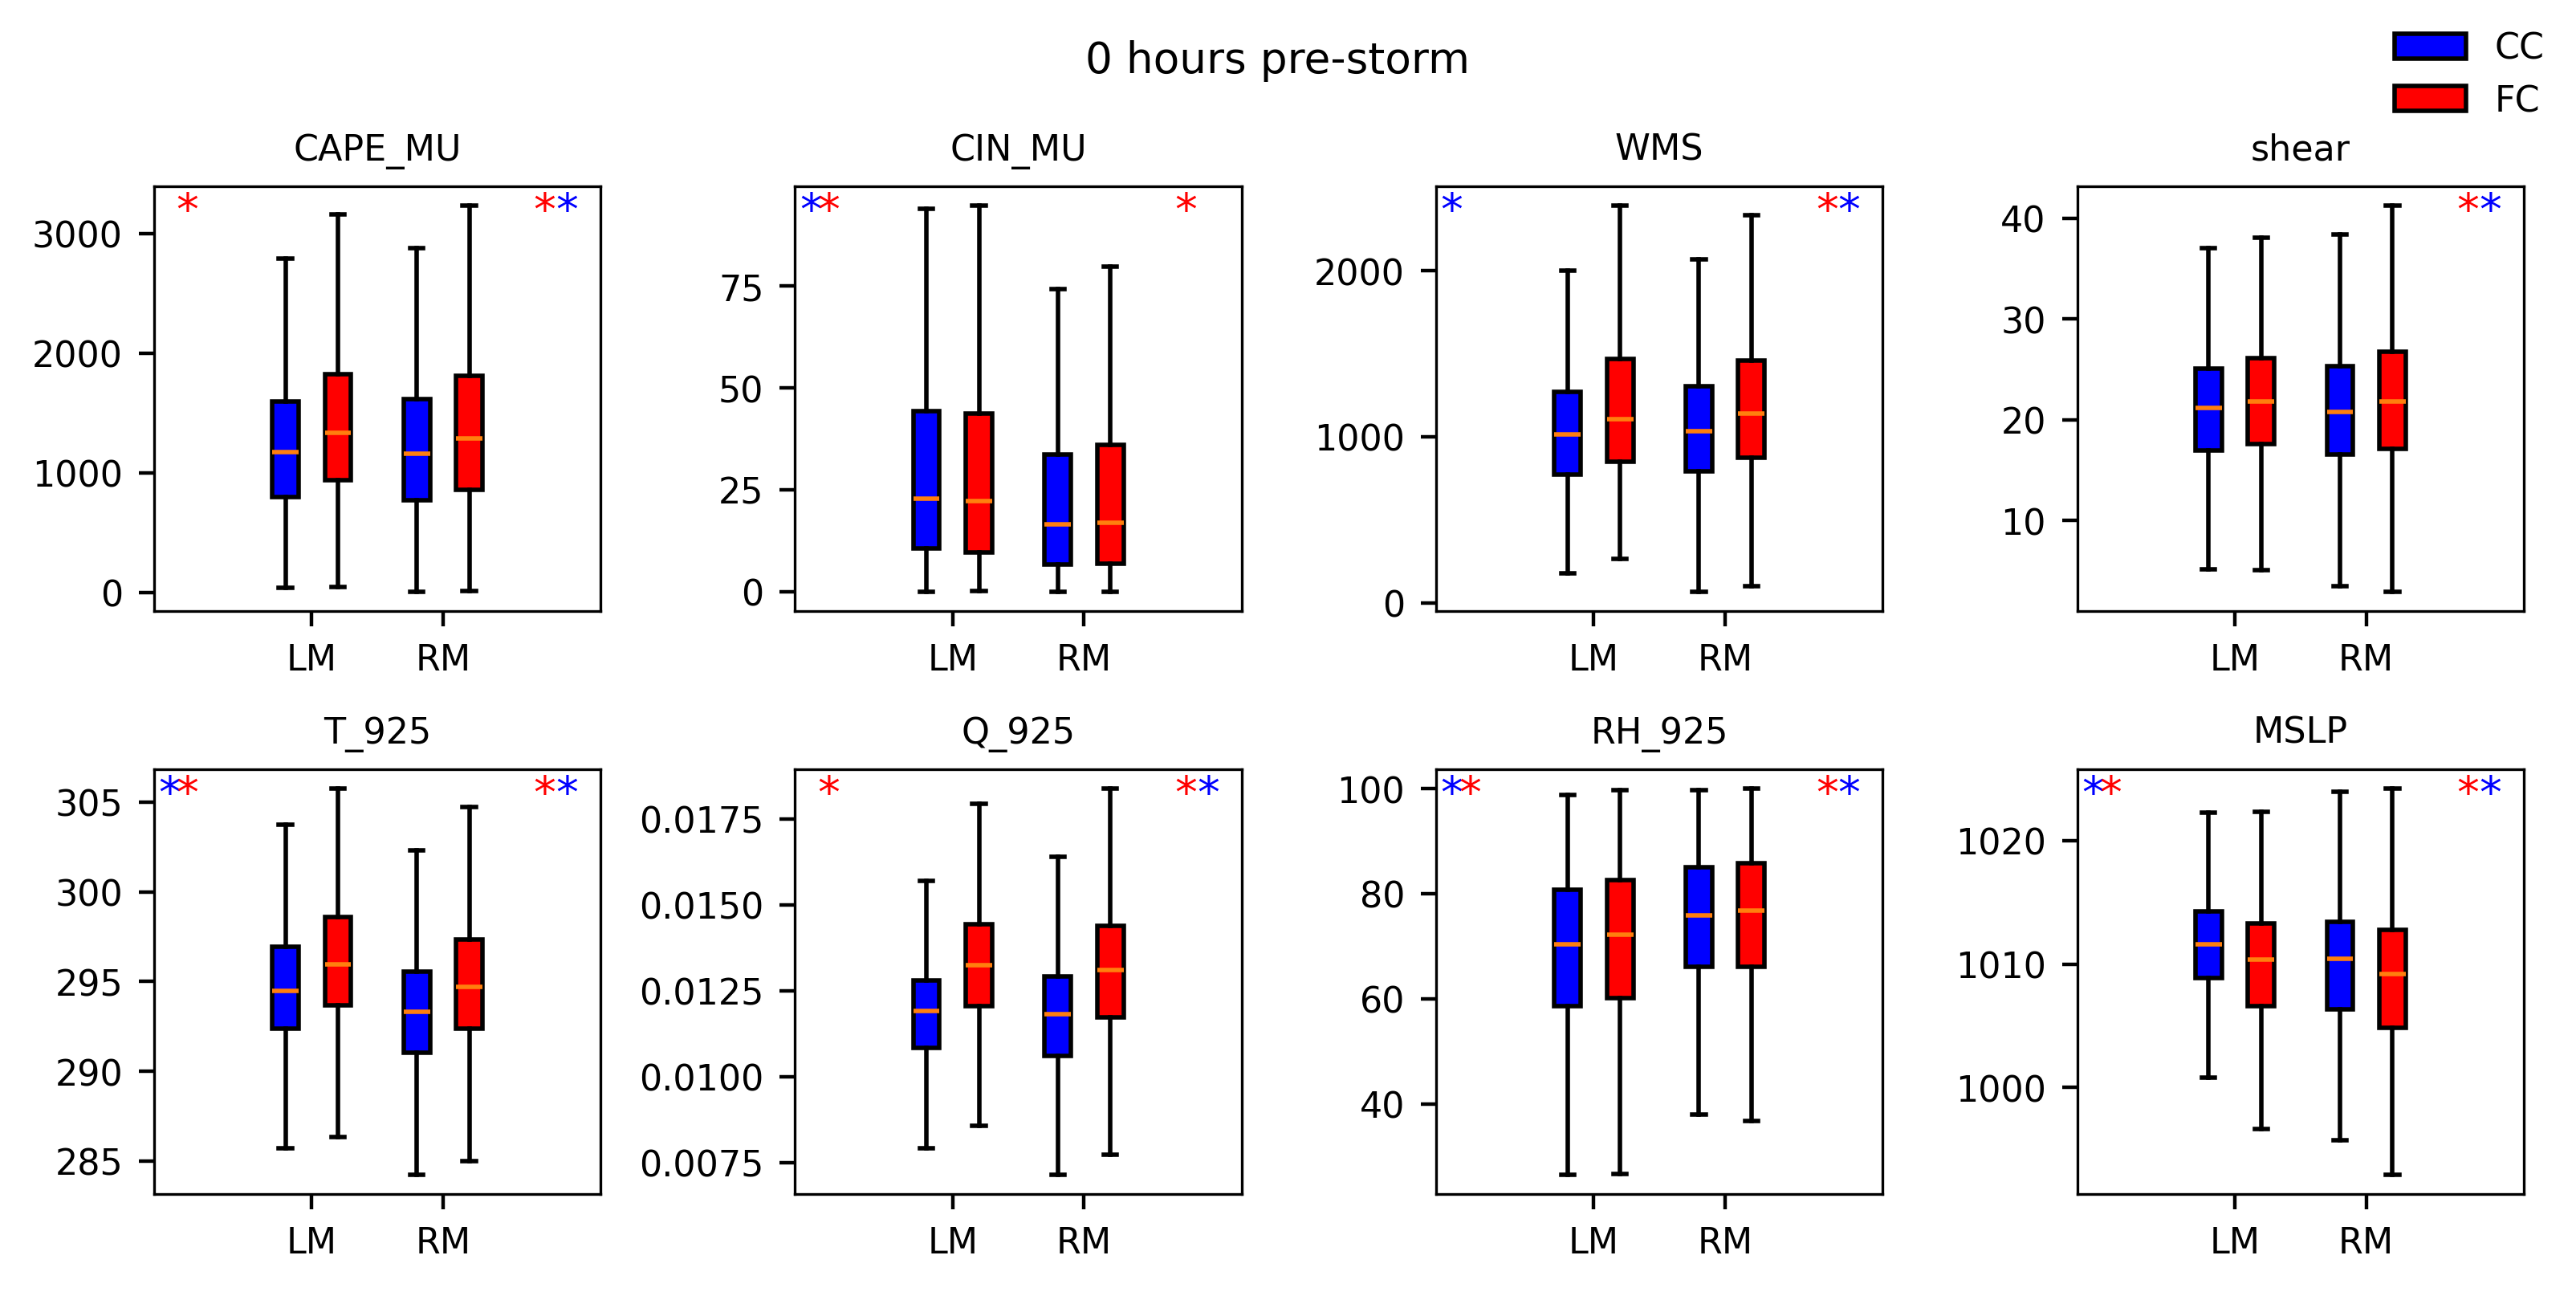

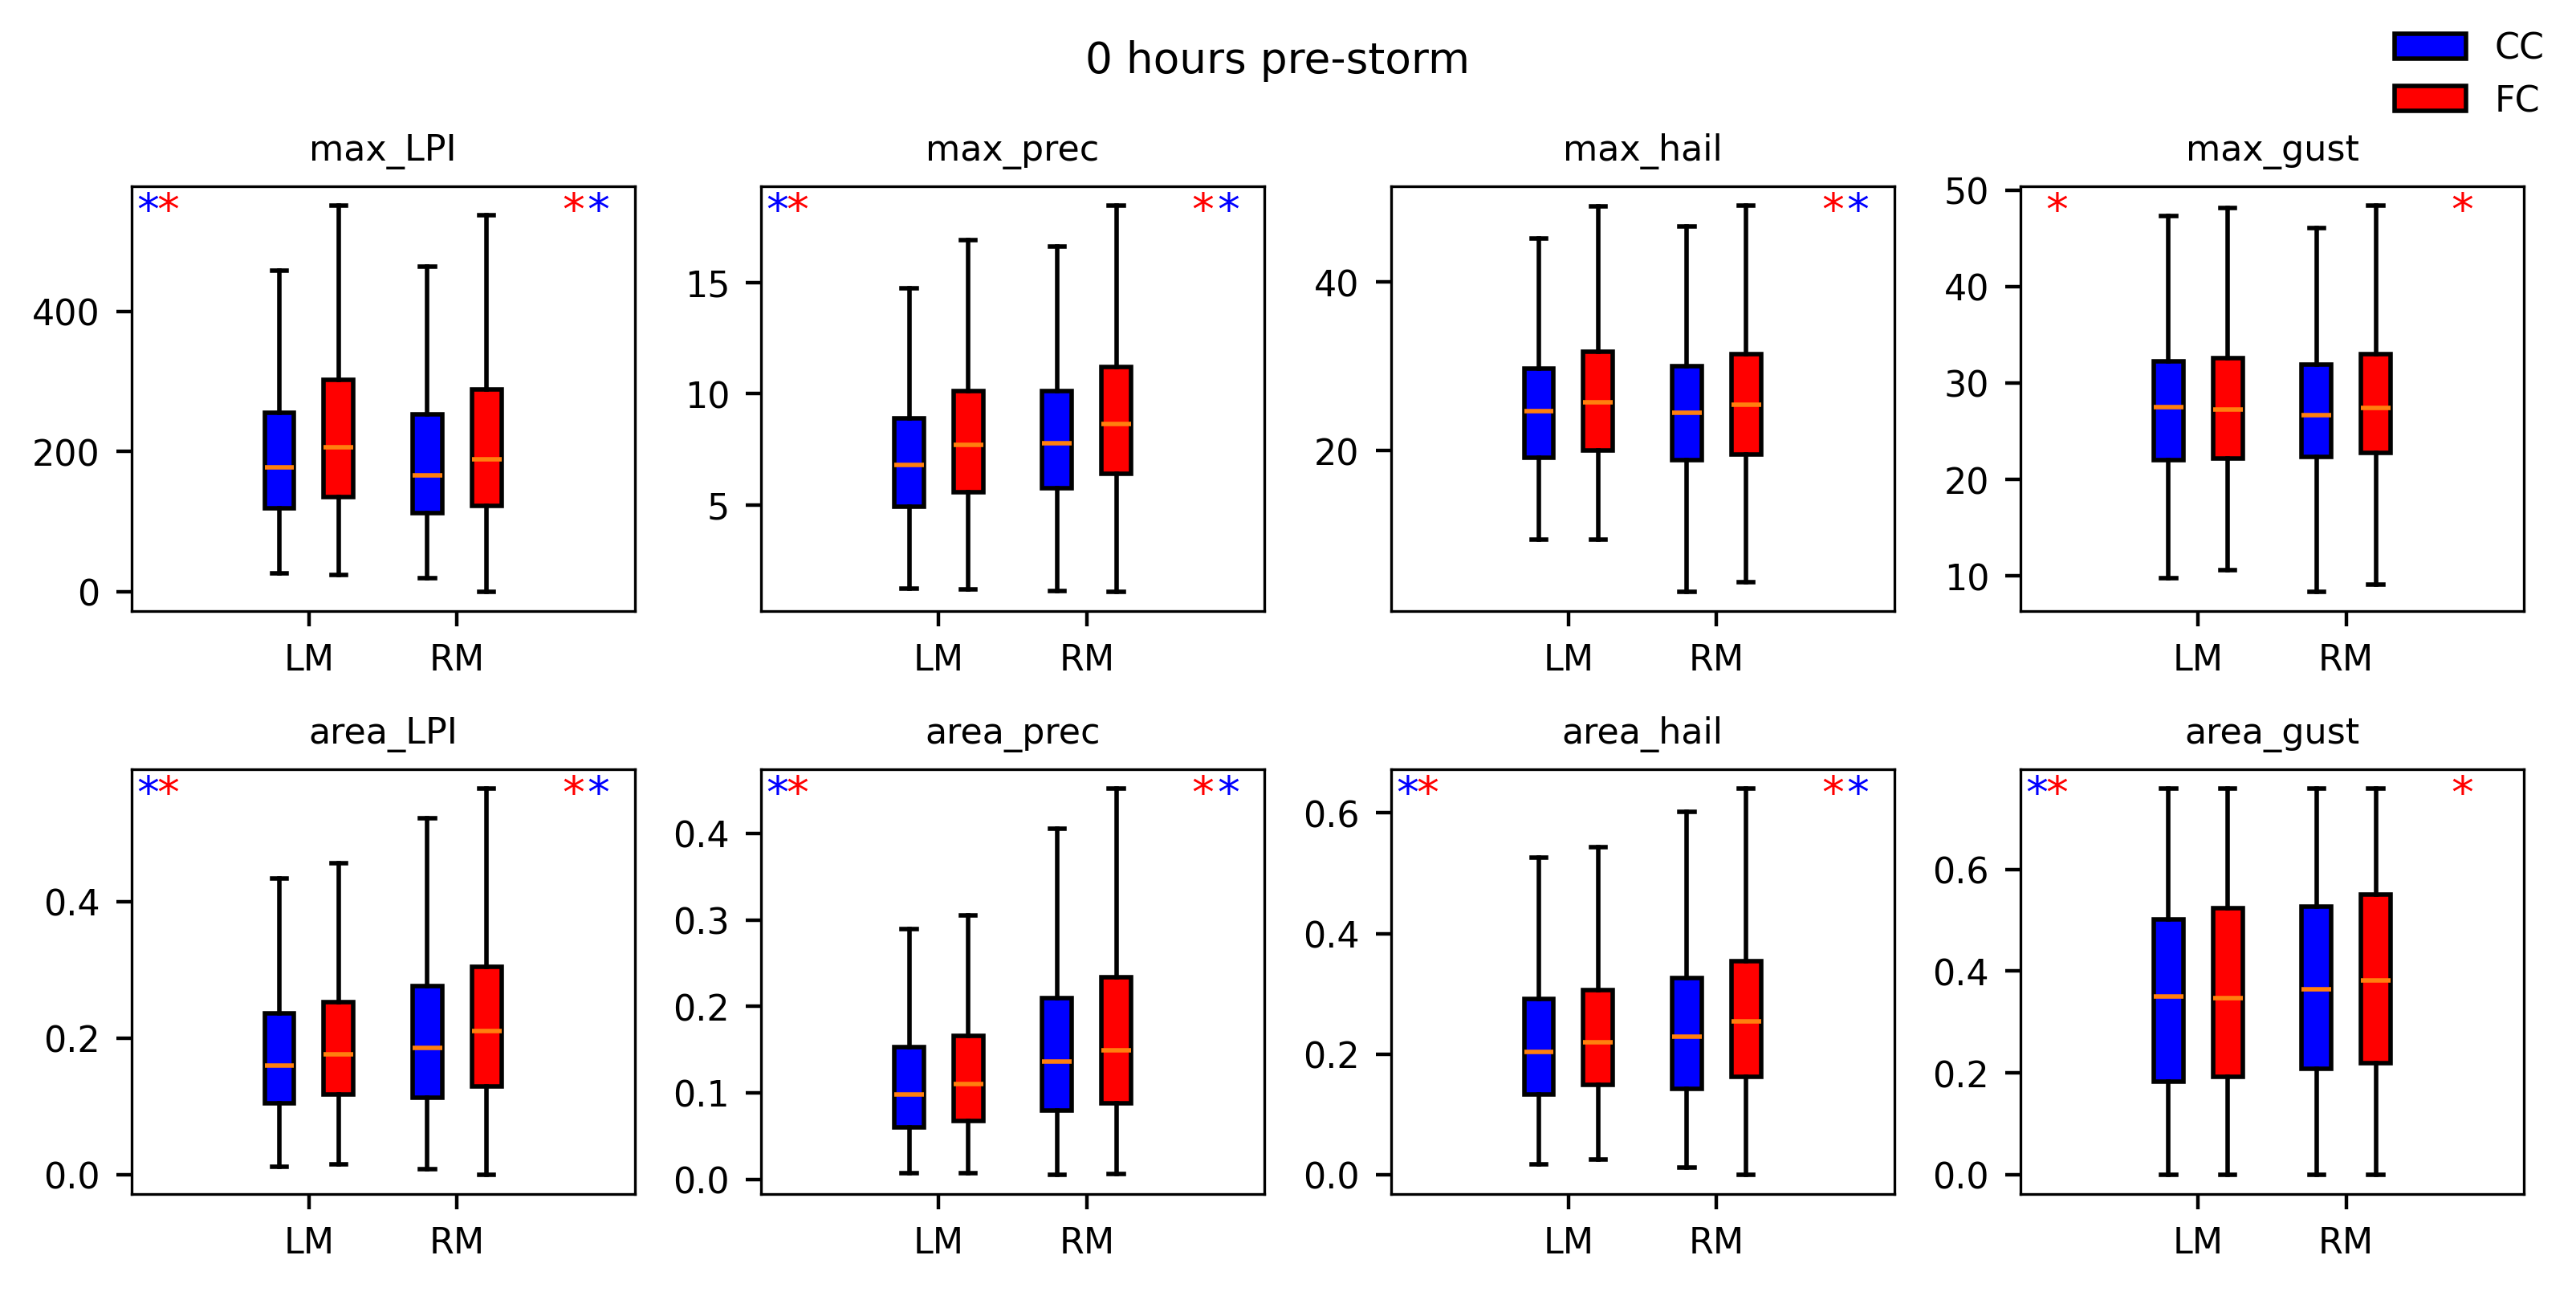

In [54]:
t = 0
reg = 'EUR'

fig, ax = plt.subplots(2, 4, figsize=(8, 4))
fig.suptitle(str(t) + ' hours pre-storm')
axes = ax.flatten()

fig2, ax2 = plt.subplots(2, 4, figsize=(8, 4))
fig2.suptitle(str(t) + ' hours pre-storm')
axes2 = ax2.flatten()

colors = ['blue', 'red']  # CC = blue, FC = red

# --- Load both climates first ---
dfs_r = []
dfs_l = []

for c in [0, 1]:
    cl = 'present' if c == 0 else 'future'
    
    df_r = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_RM_td.csv')
    df_l = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_LM_td.csv')

    # Add climate column for CC vs FC tests
    df_r['climate'] = cl
    df_l['climate'] = cl

    # Add shear
    df_r['shear'] = ((df_r.U_500 - df_r.U_925)**2 + (df_r.V_500 - df_r.V_925)**2)**0.5
    df_l['shear'] = ((df_l.U_500 - df_l.U_925)**2 + (df_l.V_500 - df_l.V_925)**2)**0.5

    dfs_r.append(df_r)
    dfs_l.append(df_l)

# Combine both climates for CC vs FC tests
df_r_all = pd.concat(dfs_r)
df_l_all = pd.concat(dfs_l)

variables_env = ['CAPE_MU', 'CIN_MU', 'WMS', 'shear', 'T_925', 'Q_925', 'RH_925', 'MSLP']
variables_haz = ['max_LPI', 'max_prec', 'max_hail', 'max_gust', 'area_LPI', 'area_prec', 'area_hail', 'area_gust']

def plot_vars(axes, variables, df_r_all, df_l_all):
    for ivar, var in enumerate(variables):
        bp = axes[ivar].boxplot(
            [df_l_all[var][df_l_all['climate'] == 'present'].dropna(), 
             df_l_all[var][df_l_all['climate'] == 'future'].dropna(),
             df_r_all[var][df_r_all['climate'] == 'present'].dropna(),
             df_r_all[var][df_r_all['climate'] == 'future'].dropna()],
            positions=[0.2, 0.4, 0.7, 0.9],  # LM CC, LM FC, RM CC, RM FC
            widths=0.1,
            showfliers=False,
            patch_artist=True
        )
        if var=='max_hail':
            print(var)
            val,lc = np.unique(df_l_all[var][df_l_all['climate'] == 'present'].dropna(),return_counts=True)
            print(val)
            print(100*lc/np.nansum(lc))
            val,rc = np.unique(df_r_all[var][df_r_all['climate'] == 'present'].dropna(),return_counts=True)
            print(val)
            print(100*rc/np.nansum(rc))

        # Color CC blue, FC red
        for i, patch in enumerate(bp['boxes']):
            patch.set_facecolor(colors[i % 2])  # even=CC(blue), odd=FC(red)

        axes[ivar].set_title(var)
        axes[ivar].set_xticks([0.3, 0.8])
        axes[ivar].set_xticklabels(['LM', 'RM'])

        # --- LM vs RM for each climate (top-left) ---
        for climate, xpos in zip(['present', 'future'], [0.01, 0.05]):
            s, p = mannwhitneyu(df_l_all[var][df_l_all['climate'] == climate].dropna(),
                                df_r_all[var][df_r_all['climate'] == climate].dropna())
            if p <= 0.05:
                color = 'blue' if climate == 'present' else 'red'
                axes[ivar].text(xpos, 0.99, '*', ha='left', va='top',
                                transform=axes[ivar].transAxes, fontsize=10, color=color)

        # --- CC vs FC for LM and RM separately (top-right) ---
        s_lm, p_lm = mannwhitneyu(df_l_all[var][df_l_all['climate'] == 'present'].dropna(),
                                  df_l_all[var][df_l_all['climate'] == 'future'].dropna())
        if p_lm <= 0.05:
            axes[ivar].text(0.95, 0.99, '*', ha='right', va='top',
                            transform=axes[ivar].transAxes, fontsize=10, color='blue')

        s_rm, p_rm = mannwhitneyu(df_r_all[var][df_r_all['climate'] == 'present'].dropna(),
                                  df_r_all[var][df_r_all['climate'] == 'future'].dropna())
        if p_rm <= 0.05:
            axes[ivar].text(0.90, 0.99, '*', ha='right', va='top',
                            transform=axes[ivar].transAxes, fontsize=10, color='red')
        

# Plot environmental vars
plot_vars(axes, variables_env, df_r_all, df_l_all)
plot_vars(axes2, variables_haz, df_r_all, df_l_all)

# Add legend manually
fig.legend(['CC', 'FC'], loc='upper right', frameon=False)
fig2.legend(['CC', 'FC'], loc='upper right', frameon=False)

fig.tight_layout()
fig.savefig(figs + f'{reg}_dist_env_t-{t}.png', dpi=300)

fig2.tight_layout()
fig2.savefig(figs + f'{reg}_dist_haz_t-{t}.png', dpi=300)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, mannwhitneyu

def plot_density_vars(axes, variables, df_r_all, df_l_all, uvar, lvar, t_vars):
    y_eval = np.linspace(0, 1, 200)  # normalized density axis if needed

    for ivar, var in enumerate(variables):
        ax = axes[ivar]
        fac=1
        if var=='max_prec': fac=12
        if var=='Q_925': fac=1000
        if 'area' in var: fac = 14400
        
        # Get data: LM CC, LM FC, RM CC, RM FC
        lm_cc = df_l_all[var][df_l_all['climate'] == 'present'].dropna()*fac
        lm_fc = df_l_all[var][df_l_all['climate'] == 'future'].dropna()*fac
        rm_cc = df_r_all[var][df_r_all['climate'] == 'present'].dropna()*fac
        rm_fc = df_r_all[var][df_r_all['climate'] == 'future'].dropna()*fac


        #bins = np.arange(vmin, vmax, inter)

        # Compute histograms first
        hist1, bins1 = np.histogram(rm_cc, density=True)
        hist2, bins2 = np.histogram(lm_cc, density=True)
        hist3, bins3 = np.histogram(rm_fc, density=True)
        hist4, bins4 = np.histogram(lm_fc, density=True)

        bin_centers1 = 0.5 * (bins1[:-1] + bins1[1:])
        bin_centers2 = 0.5 * (bins2[:-1] + bins2[1:])
        bin_centers3 = 0.5 * (bins3[:-1] + bins3[1:])
        bin_centers4 = 0.5 * (bins4[:-1] + bins4[1:])


        # Positive histograms (to the right)
        ax.barh(bin_centers1, -hist1, height=np.diff(bins1), color='#E32F27', alpha=0.5)
        ax.barh(bin_centers2, -hist2, height=np.diff(bins2), color='#1F63A8', alpha=0.5)

        # Negative histograms (mirrored, to the left)
        ax.barh(bin_centers3, hist3, height=np.diff(bins3), color='#E32F27', alpha=0.5)
        ax.barh(bin_centers4, hist4, height=np.diff(bins4), color='#1F63A8', alpha=0.5)
        
        # KDEs
        kde_lm_cc = gaussian_kde(lm_cc, bw_method=0.3)
        kde_lm_fc = gaussian_kde(lm_fc, bw_method=0.3)
        kde_rm_cc = gaussian_kde(rm_cc, bw_method=0.3)
        kde_rm_fc = gaussian_kde(rm_fc, bw_method=0.3)
        
        # X-axis = variable values, Y-axis = density
        x_eval = np.linspace(min(lm_cc.min(), lm_fc.min(), rm_cc.min(), rm_fc.min()),
                             max(lm_cc.max(), lm_fc.max(), rm_cc.max(), rm_fc.max()), 300)
        
        # CC on left (negative), FC on right (positive)
        colors = ['#1F63A8', '#E32F27'] 
        ax.plot(-kde_lm_cc(x_eval), x_eval, color='#1F63A8', lw=2, label='LM CC' if ivar == 0 else "")
        ax.plot(kde_lm_fc(x_eval), x_eval, color='#1F63A8', lw=2, ls='--', label='LM FC' if ivar == 0 else "")
        ax.plot(-kde_rm_cc(x_eval), x_eval, color='#E32F27', lw=2, label='RM CC' if ivar == 0 else "")
        ax.plot(kde_rm_fc(x_eval), x_eval, color='#E32F27', lw=2, ls='--', label='RM FC' if ivar == 0 else "")
        xmax = max(abs(v) for v in ax.get_xlim())
        # Percentiles: CC -> left side only, FC -> right side only
        linestyles = [':', '-', ':']
        for vals, side, color in [(lm_cc, 'left', '#1F63A8'), (rm_cc, 'left', '#E32F27')]:
            p25, p50, p75 = np.percentile(vals, [25, 50, 75])
            for p, ls in zip([p25, p50, p75], linestyles):
                ax.hlines(p, xmin=-xmax,xmax=0, color=color, lw=1, ls=ls)

        for vals, side, color in [(lm_fc, 'right', '#1F63A8'), (rm_fc, 'right', '#E32F27')]:
            p25, p50, p75 = np.percentile(vals, [25, 50, 75])
            for p, ls in zip([p25, p50, p75], linestyles):
                ax.hlines(p, xmin=0,xmax=xmax,color=color, lw=1, ls=ls)
        
        # Add significance stars (optional)
        s_lm, p_lm = mannwhitneyu(lm_cc, lm_fc)
        s_rm, p_rm = mannwhitneyu(rm_cc, rm_fc)
        s_cc, p_cc = mannwhitneyu(lm_cc, rm_cc)
        s_fc, p_fc = mannwhitneyu(lm_fc, rm_fc)
        if p_lm <= 0.05:
            ax.text(0.45, 1.05, '*', transform=ax.transAxes, color='#1F63A8', ha='center', va='top')
        if p_rm <= 0.05:
            ax.text(0.55, 1.05, '*', transform=ax.transAxes, color='#E32F27', ha='center', va='top')
        if p_cc <= 0.05:
            ax.text(0.1, 1.05, '*', transform=ax.transAxes, color='k', ha='center', va='top')
        if p_fc <= 0.05:
            ax.text(0.9, 1.05, '*', transform=ax.transAxes, color='k', ha='center', va='top')
        
        
        ax.set_xlim(-xmax, xmax)
        ax.set_xticks([-0.5*xmax, 0.5*xmax],['CC','FC'])
        ax.set_ylim(lvar[ivar])
        
        # Style
        ax.axvline(0, color='black', lw=1)
        ax.set_title(t_vars[ivar],pad=7.5)
        # ax.set_xlabel('Density')
        ax.set_ylabel(uvar[ivar])

    # axes[0].legend(loc='upper right')



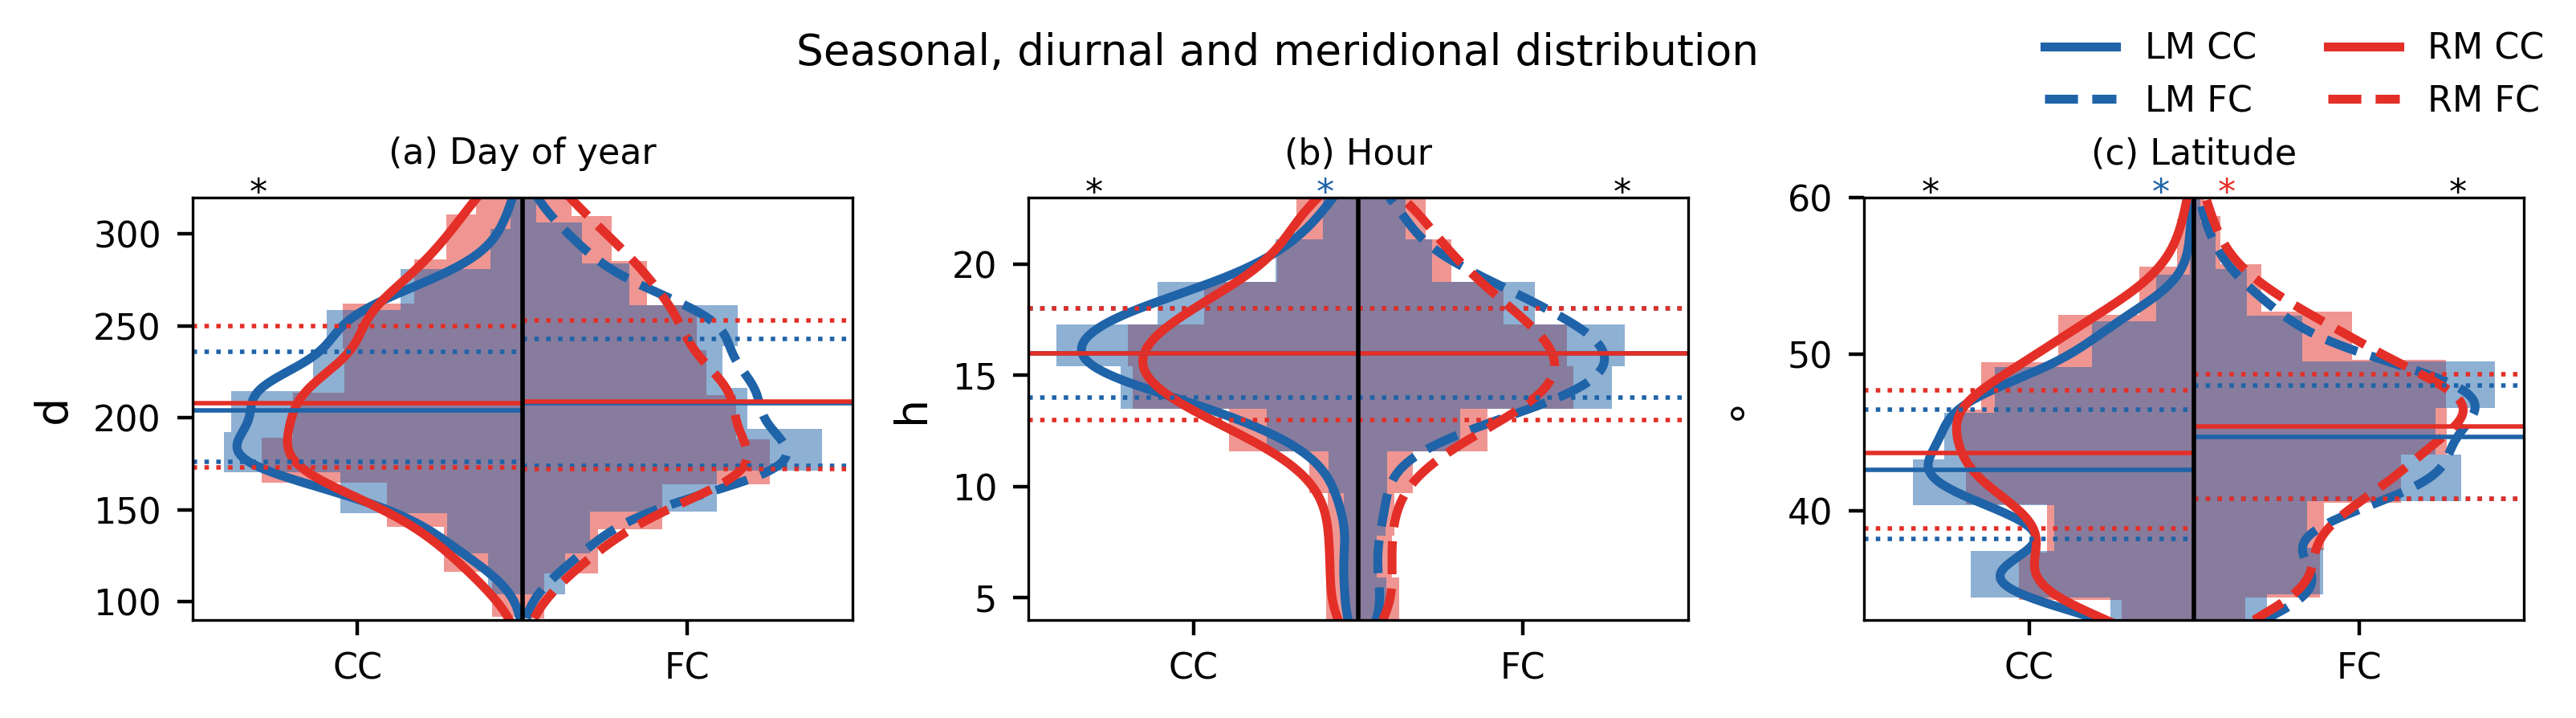

In [26]:
t = 0
reg = 'EUR'

fig, ax = plt.subplots(1, 3, figsize=(8, 2.2))
fig.suptitle('Seasonal, diurnal and meridional distribution')
axes = ax.flatten()

colors = colors = ['#1F63A8', '#E32F27']   # CC = blue, FC = red

# --- Load both climates first ---
dfs_r = []
dfs_l = []

for c in [0, 1]:
    cl = 'present' if c == 0 else 'future'
    
    df_r = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_RM_td.csv')
    df_l = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_LM_td.csv')

    for df in [df_r, df_l]:
        times = pd.to_datetime(df.time)
        df['doy'] = times.dt.dayofyear
        df['month'] = times.dt.month
        df['hour'] = times.dt.hour

    # Add climate column for CC vs FC tests
    df_r['climate'] = cl
    df_l['climate'] = cl

    # Add shear
    df_r['shear'] = ((df_r.U_500 - df_r.U_925)**2 + (df_r.V_500 - df_r.V_925)**2)**0.5
    df_l['shear'] = ((df_l.U_500 - df_l.U_925)**2 + (df_l.V_500 - df_l.V_925)**2)**0.5

    dfs_r.append(df_r)
    dfs_l.append(df_l)

# Combine both climates for CC vs FC tests
df_r_all = pd.concat(dfs_r)
df_l_all = pd.concat(dfs_l)

variables_env = ['doy','hour','lat']
units_env = ['d','h','°']
limits_env = [[90,320],[4,23],[33,60]]

# Plot environmental vars
plot_density_vars(axes, variables_env, df_r_all, df_l_all, units_env, limits_env, t_vars=['(a) Day of year','(b) Hour','(c) Latitude'])

# Add legend manually
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, frameon=False)

fig.tight_layout()
fig.savefig(figs + f'{reg}_dist_geo_t-{t}.png', dpi=300)

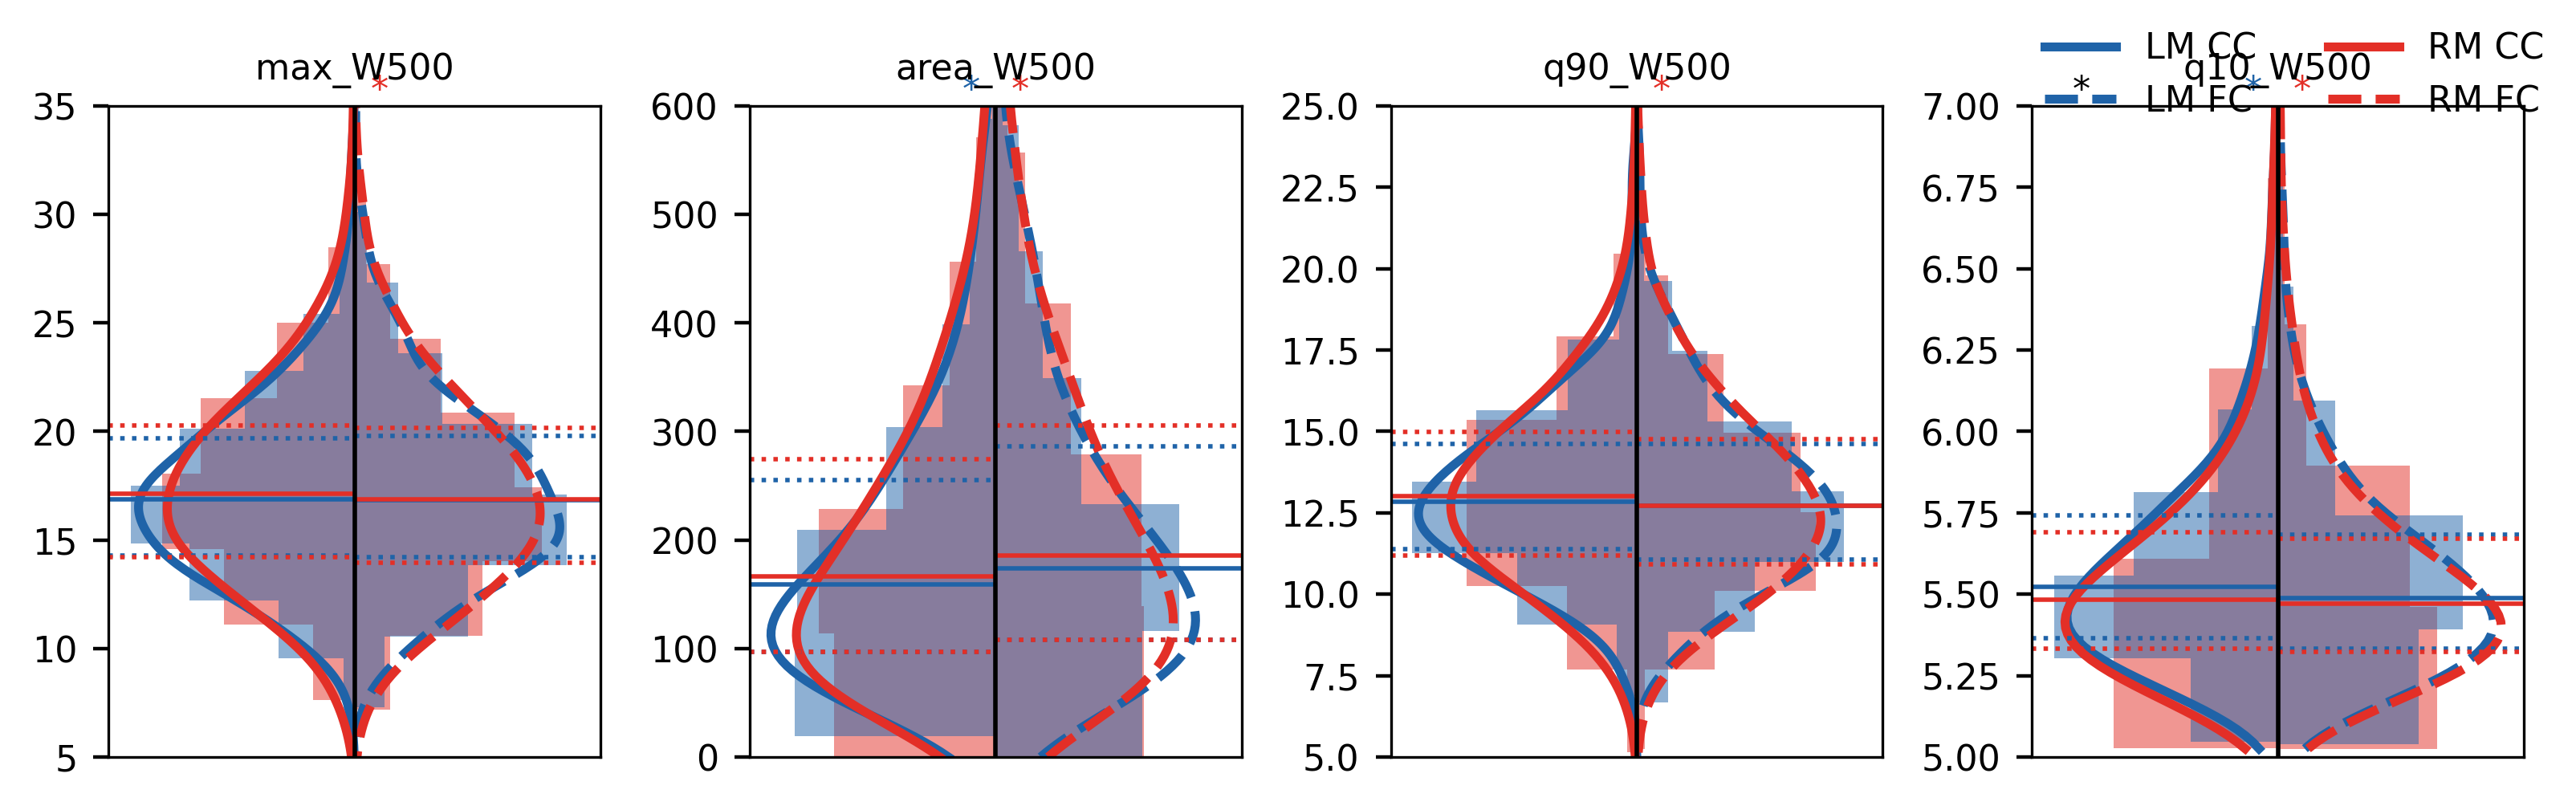

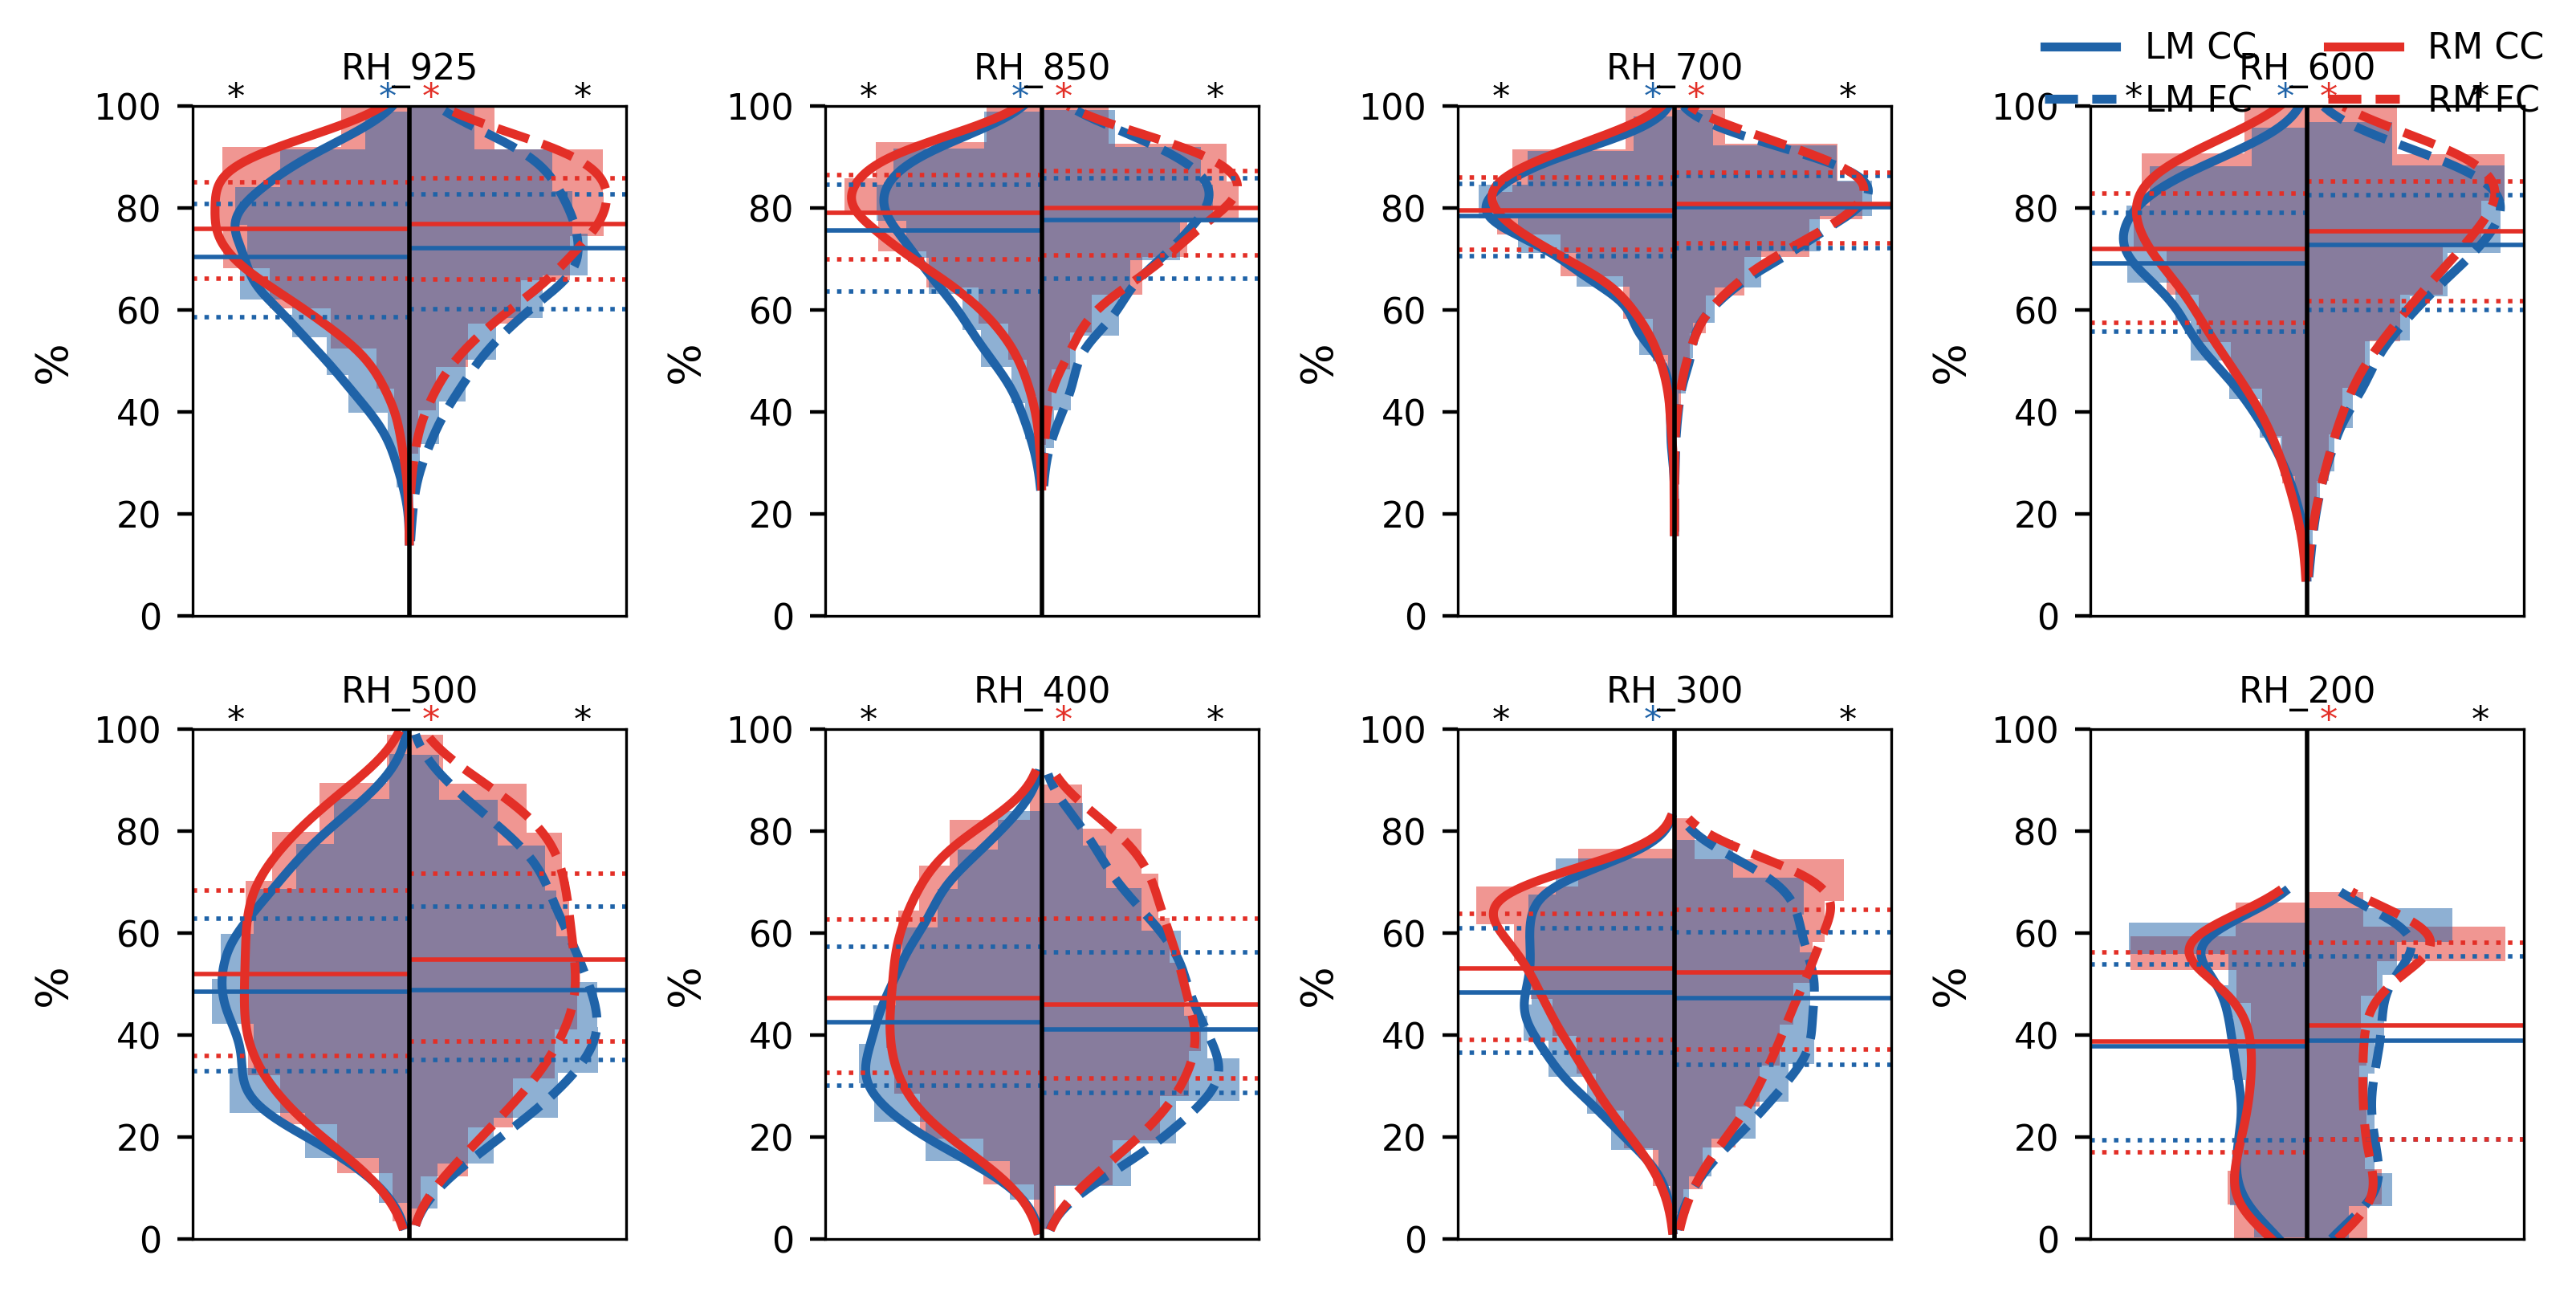

In [59]:
t = 0
reg = 'EUR'



colors = colors = ['#1F63A8', '#E32F27']   # CC = blue, FC = red

# --- Load both climates first ---
dfs_r = []
dfs_l = []

for c in [0, 1]:
    cl = 'present' if c == 0 else 'future'
    
    df_r = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_RM_td.csv')
    df_l = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_LM_td.csv')

    # Add climate column for CC vs FC tests
    df_r['climate'] = cl
    df_l['climate'] = cl

    # Add shear
    df_r['shear'] = ((df_r.U_500 - df_r.U_925)**2 + (df_r.V_500 - df_r.V_925)**2)**0.5
    df_l['shear'] = ((df_l.U_500 - df_l.U_925)**2 + (df_l.V_500 - df_l.V_925)**2)**0.5

    dfs_r.append(df_r)
    dfs_l.append(df_l)

# Combine both climates for CC vs FC tests
df_r_all = pd.concat(dfs_r)
df_l_all = pd.concat(dfs_l)

fig, ax = plt.subplots(1, 4, figsize=(8, 2.5))
#fig.suptitle('Seasonal, diurnal and meridional distribution')
axes = ax.flatten()

variables_env = ['max_W500','area_W500','q90_W500','q10_W500']
units_env = ['','','','']
limits_env = [[5,35],[0,600],[5,25],[5,7]]


# Plot environmental vars
plot_density_vars(axes, variables_env, df_r_all, df_l_all, units_env, limits_env)

# Add legend manually
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, frameon=False)

fig.tight_layout()
fig.savefig(figs + f'{reg}_dist_w_t-{t}.png', dpi=300)


fig, ax = plt.subplots(2, 4, figsize=(8, 4))
#fig.suptitle('Seasonal, diurnal and meridional distribution')
axes = ax.flatten()

variables_env = ['RH_925','RH_850','RH_700','RH_600','RH_500','RH_400','RH_300','RH_200']

units_env = ['%','%','%','%','%','%','%','%',]
limits_env = [[0,100],[0,100],[0,100],[0,100],[0,100],[0,100],[0,100],[0,100]]

# Plot environmental vars
plot_density_vars(axes, variables_env, df_r_all, df_l_all, units_env, limits_env)

# Add legend manually
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, frameon=False)

fig.tight_layout()
fig.savefig(figs + f'{reg}_dist_rh_t-{t}.png', dpi=300)

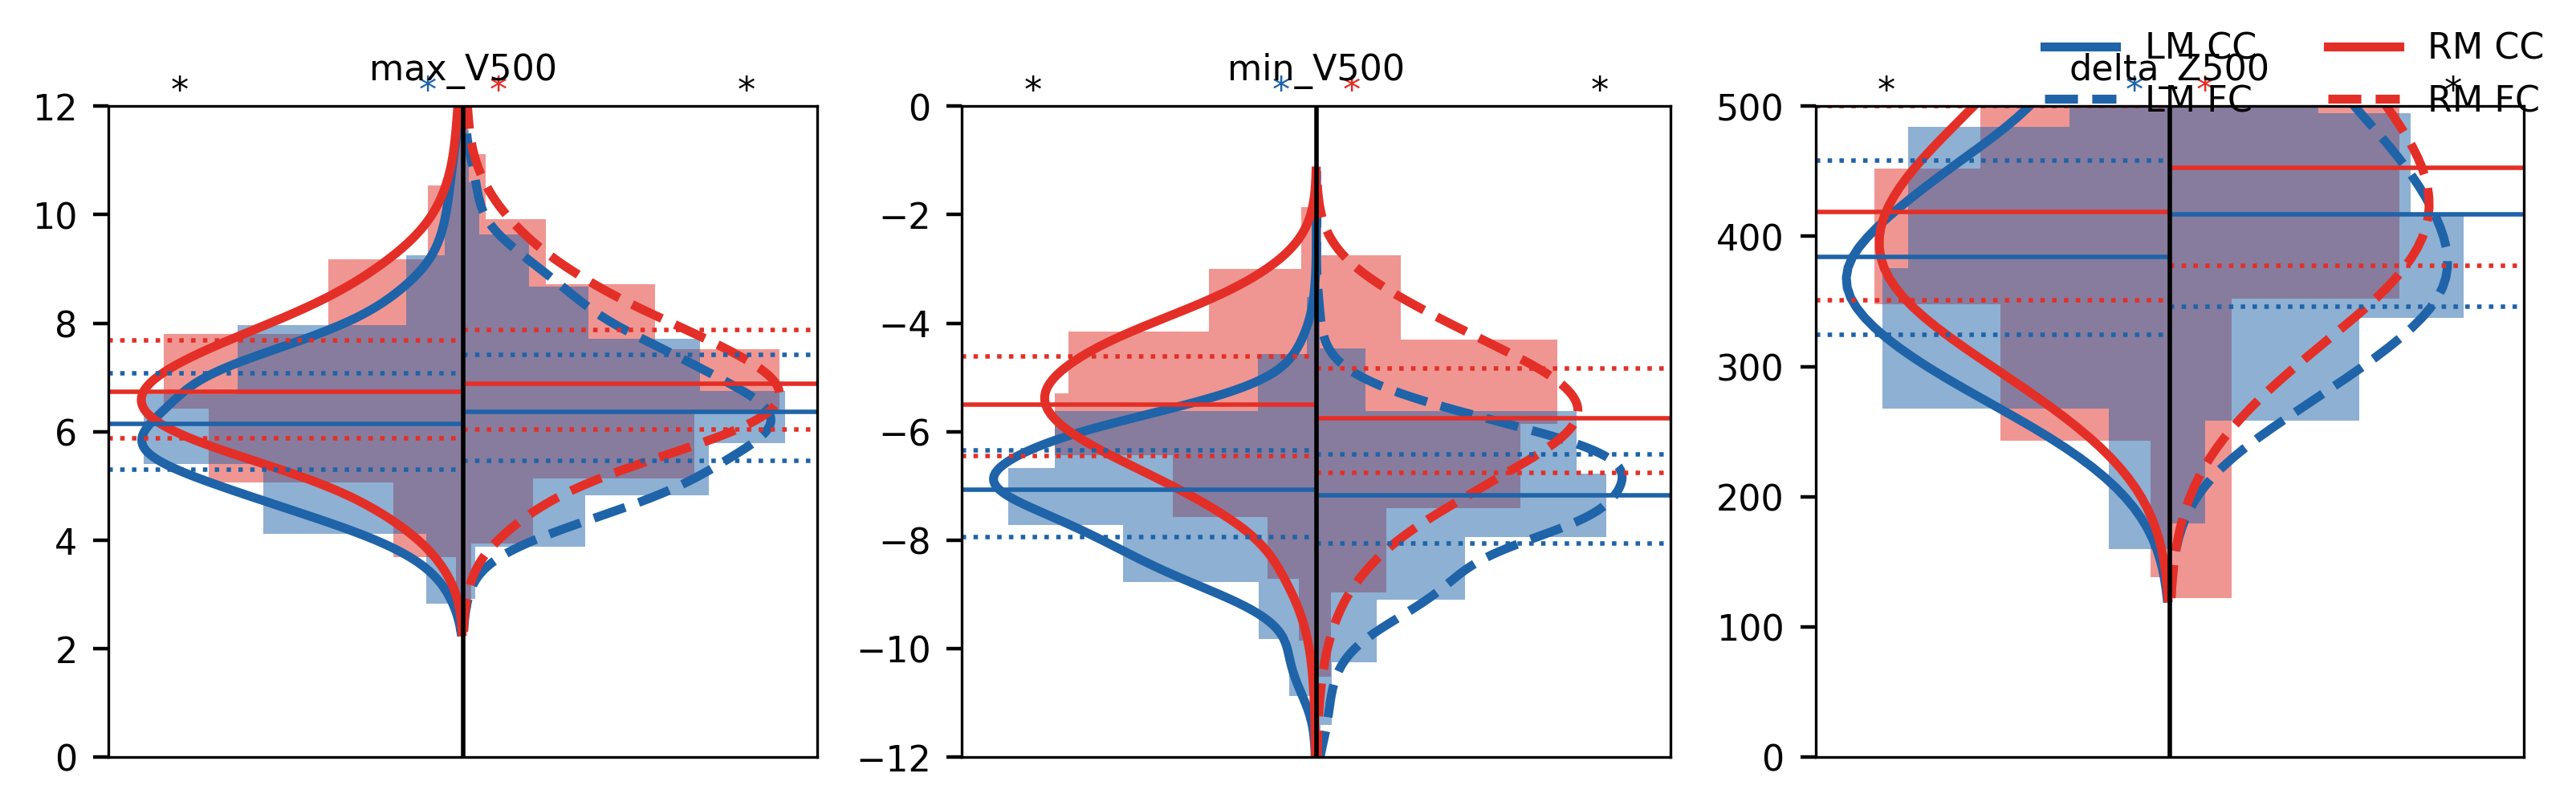

In [9]:
t = 0
reg = 'EUR'



colors = colors = ['#1F63A8', '#E32F27']   # CC = blue, FC = red

# --- Load both climates first ---
dfs_r = []
dfs_l = []

for c in [0, 1]:
    cl = 'present' if c == 0 else 'future'
    
    df_r = pd.read_csv(data + f'zdisk_{reg}_{cl}_t-{t}_RM_td.csv')
    df_l = pd.read_csv(data + f'zdisk_{reg}_{cl}_t-{t}_LM_td.csv')

    # Add climate column for CC vs FC tests
    df_r['climate'] = cl
    df_l['climate'] = cl

    # Add shear
    df_r['shear'] = ((df_r.U_500 - df_r.U_925)**2 + (df_r.V_500 - df_r.V_925)**2)**0.5
    df_l['shear'] = ((df_l.U_500 - df_l.U_925)**2 + (df_l.V_500 - df_l.V_925)**2)**0.5

    dfs_r.append(df_r)
    dfs_l.append(df_l)

# Combine both climates for CC vs FC tests
df_r_all = pd.concat(dfs_r)
df_l_all = pd.concat(dfs_l)

fig, ax = plt.subplots(1, 3, figsize=(8, 2.5))
#fig.suptitle('Seasonal, diurnal and meridional distribution')
axes = ax.flatten()

variables_env = ['max_V500','min_V500','delta_Z500']
units_env = ['','','','']
limits_env = [[0,12],[-12,0],[0,500],]

# Plot environmental vars
plot_density_vars(axes, variables_env, df_r_all, df_l_all, units_env, limits_env)

# Add legend manually
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, frameon=False)

fig.tight_layout()
fig.savefig(figs + f'{reg}_dist_vz_t-{t}.png', dpi=300)



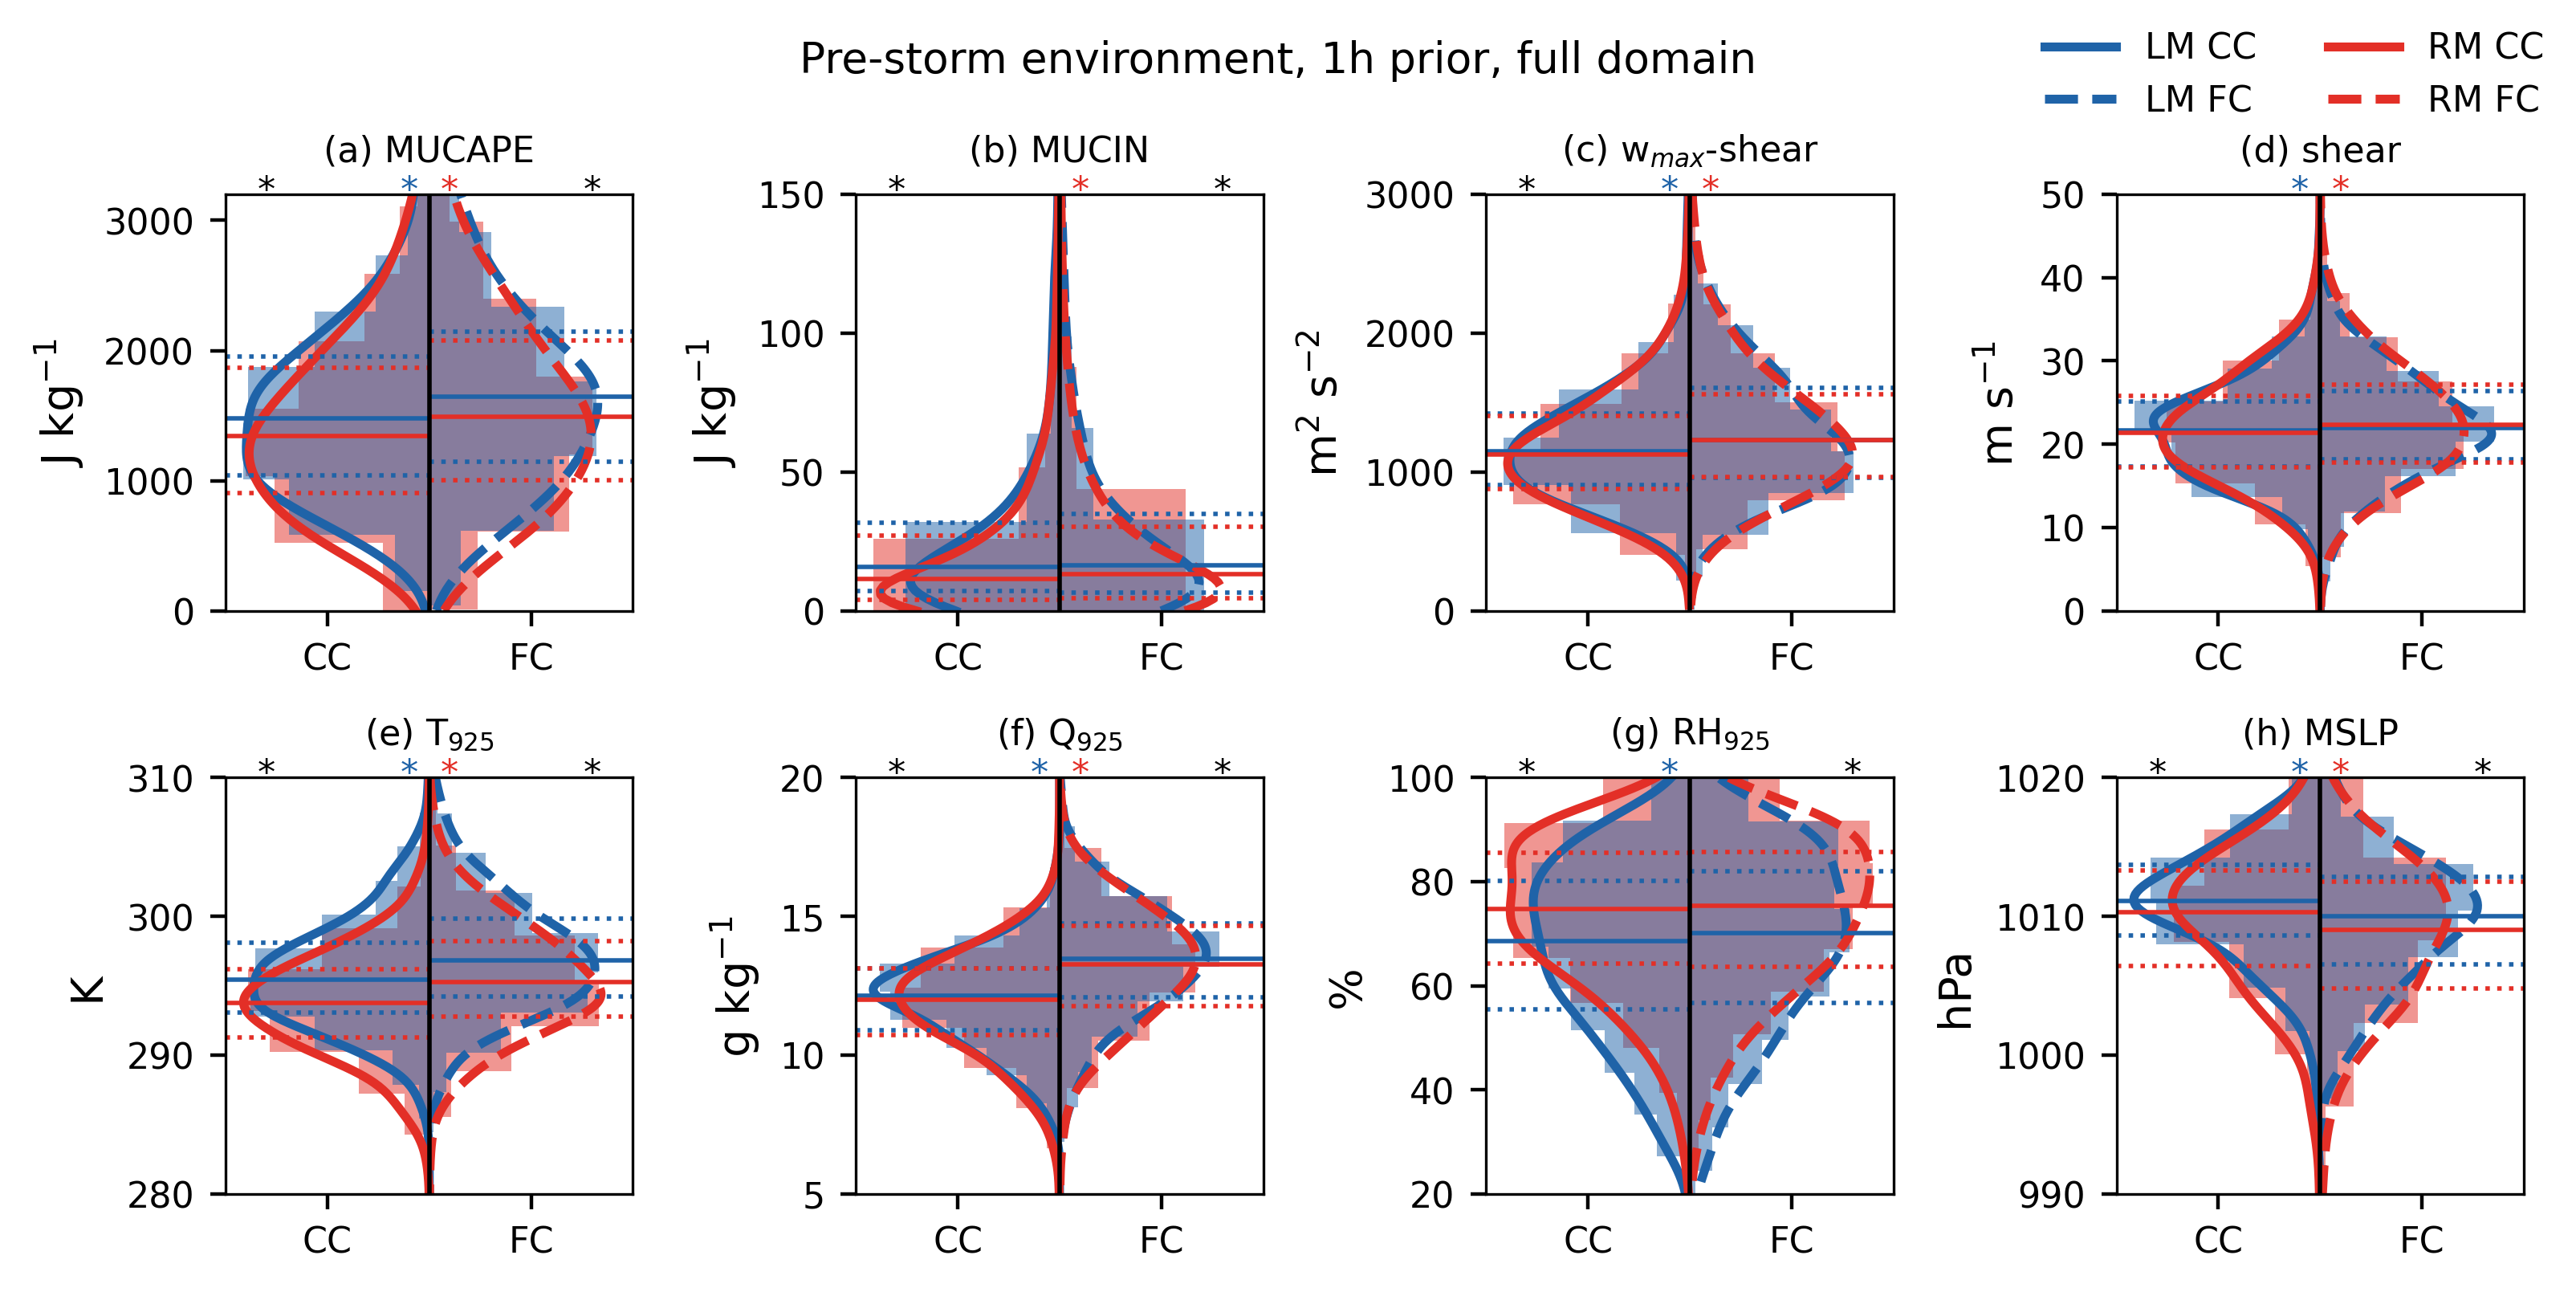

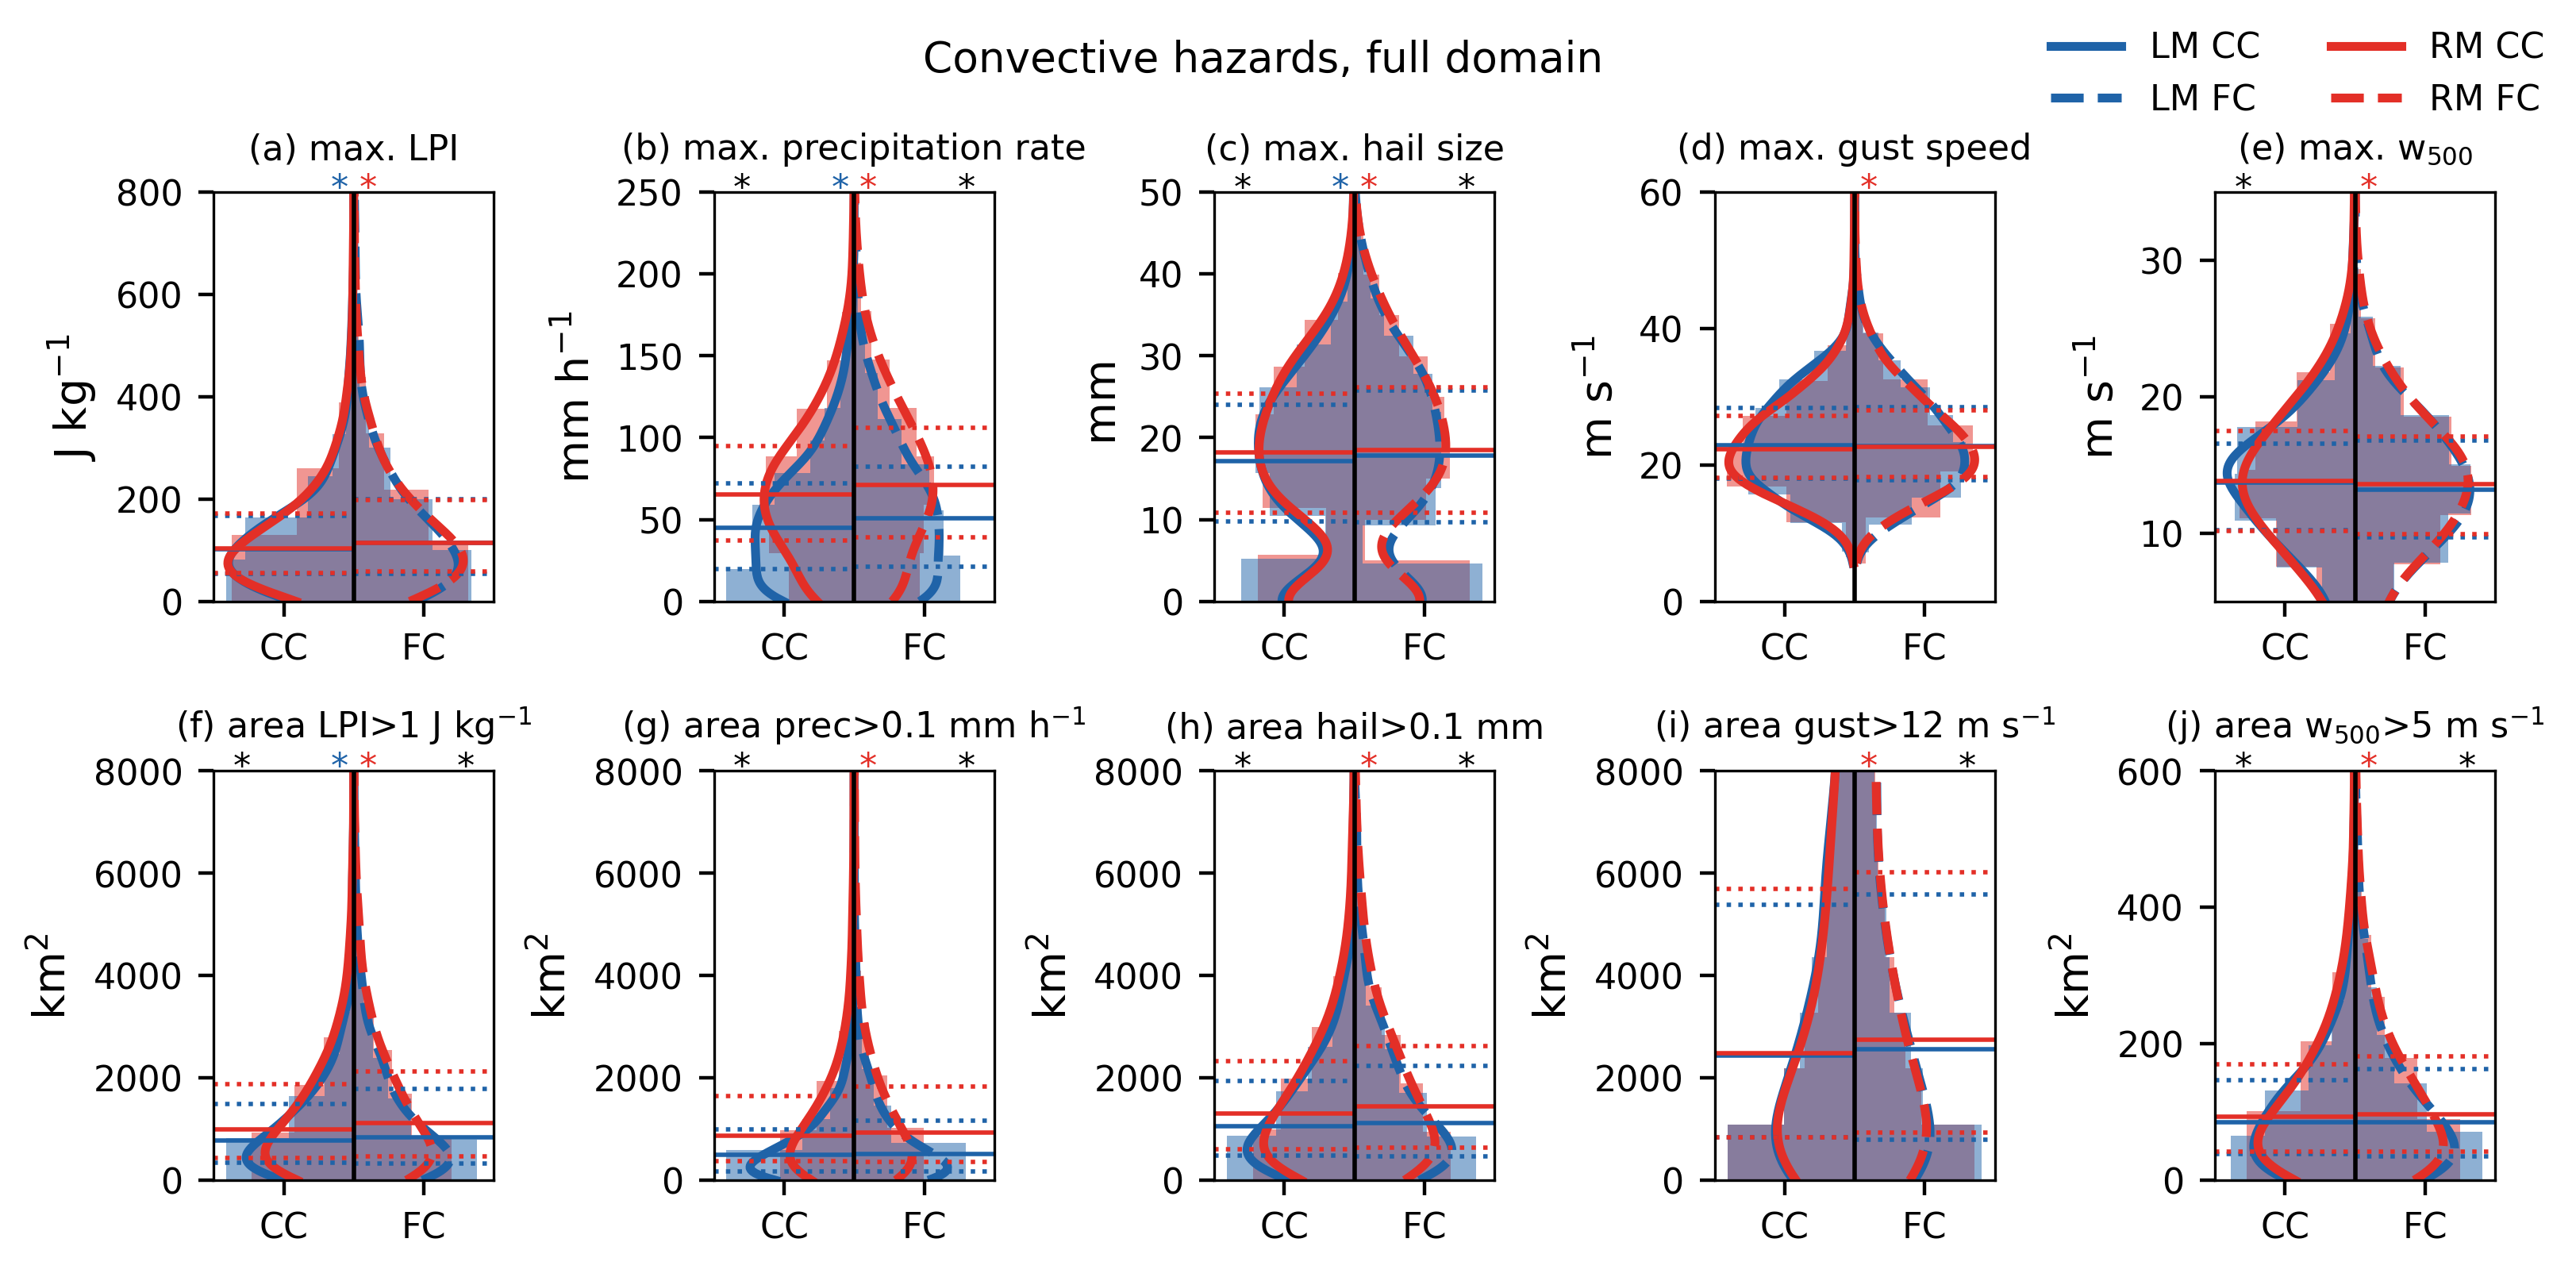

In [25]:
t = 1
reg = 'EUR'

fig, ax = plt.subplots(2, 4, figsize=(8, 4))
fig.suptitle('Pre-storm environment, 1h prior, full domain')
axes = ax.flatten()

fig2, ax2 = plt.subplots(2, 5, figsize=(8, 4))
fig2.suptitle('Convective hazards, full domain')
axes2 = ax2.flatten()

colors = colors = ['#1F63A8', '#E32F27']   # CC = blue, FC = red

# --- Load both climates first ---
dfs_r = []
dfs_l = []

for c in [0, 1]:
    cl = 'present' if c == 0 else 'future'
    
    df_r = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_RM_td.csv')
    df_l = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_LM_td.csv')

    # Add climate column for CC vs FC tests
    df_r['climate'] = cl
    df_l['climate'] = cl

    # Add shear
    df_r['shear'] = ((df_r.U_500 - df_r.U_925)**2 + (df_r.V_500 - df_r.V_925)**2)**0.5
    df_l['shear'] = ((df_l.U_500 - df_l.U_925)**2 + (df_l.V_500 - df_l.V_925)**2)**0.5

    dfs_r.append(df_r)
    dfs_l.append(df_l)

# Combine both climates for CC vs FC tests
df_r_all = pd.concat(dfs_r)
df_l_all = pd.concat(dfs_l)

variables_env = ['CAPE_MU', 'CIN_MU', 'WMS', 'shear', 'T_925', 'Q_925', 'RH_925', 'MSLP']
units_env = ['J kg$^{-1}$','J kg$^{-1}$','m$^{2}$ s$^{-2}$','m s$^{-1}$','K','g kg$^{-1}$','%','hPa']
limits_env = [[0,3200],[0,150],[0,3000],[0,50],[280,310],[5,20],[20,100],[990,1020]]
variables_haz = ['max_LPI', 'max_prec', 'max_hail', 'max_gust', 'max_W500', 'area_LPI', 'area_prec', 'area_hail', 'area_gust','area_W500']
units_haz = ['J kg$^{-1}$', 'mm h$^{-1}$','mm','m s$^{-1}$','m s$^{-1}$', 'km$^2$', 'km$^2$', 'km$^2$', 'km$^2$', 'km$^2$']
limits_haz = [[0,800],[0,250],[0,50],[0,60],[5,35],[0,8000],[0,8000],[0,8000],[0,8000],[0,600]]
titles_env = ['(a) MUCAPE', '(b) MUCIN', '(c) w$_{max}$-shear', '(d) shear', '(e) T$_{925}$', '(f) Q$_{925}$', '(g) RH$_{925}$', '(h) MSLP']
titles_haz = ['(a) max. LPI', '(b) max. precipitation rate', '(c) max. hail size', '(d) max. gust speed', '(e) max. w$_{500}$',
 '(f) area LPI>1 J kg$^{-1}$', '(g) area prec>0.1 mm h$^{-1}$', '(h) area hail>0.1 mm', '(i) area gust>12 m s$^{-1}$','(j) area w$_{500}$>5 m s$^{-1}$']


# Plot environmental vars
plot_density_vars(axes, variables_env, df_r_all, df_l_all, units_env, limits_env, titles_env)
plot_density_vars(axes2, variables_haz, df_r_all, df_l_all, units_haz, limits_haz, titles_haz)

# Add legend manually
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, frameon=False)
handles2, labels2 = axes2[0].get_legend_handles_labels()
fig2.legend(handles2, labels2, loc='upper right', ncol=2, frameon=False)

fig.tight_layout()
fig.savefig(figs + f'{reg}_dist_env_t-{t}.png', dpi=300)

fig2.tight_layout()
fig2.savefig(figs + f'{reg}_dist_haz_t-{t}.png', dpi=300)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, mannwhitneyu

def plot_density_vars_two_regions(
    axes, variables, df_r_all_reg1, df_l_all_reg1, df_r_all_reg2, df_l_all_reg2, uvar, lvar, tvar
):
    for ivar, var in enumerate(variables):
        ax = axes[ivar]
        fac = 1
        if var == 'max_prec': fac = 12
        if var == 'Q_925': fac = 1000
        if 'area' in var: fac = 14400
        
        # --- Get data for both regions ---
        def get_data(df_r, df_l):
            lm_cc = df_l[var][df_l['climate'] == 'present'].dropna() * fac
            lm_fc = df_l[var][df_l['climate'] == 'future'].dropna() * fac
            rm_cc = df_r[var][df_r['climate'] == 'present'].dropna() * fac
            rm_fc = df_r[var][df_r['climate'] == 'future'].dropna() * fac
            return lm_cc, lm_fc, rm_cc, rm_fc

        lm_cc_r1, lm_fc_r1, rm_cc_r1, rm_fc_r1 = get_data(df_r_all_reg1, df_l_all_reg1)
        lm_cc_r2, lm_fc_r2, rm_cc_r2, rm_fc_r2 = get_data(df_r_all_reg2, df_l_all_reg2)

        # --- KDEs ---
        def get_kde(data):
            return gaussian_kde(data, bw_method=0.3) if len(data) > 1 else None

        kde_sets = {
            "lm_cc_r1": get_kde(lm_cc_r1), "lm_fc_r1": get_kde(lm_fc_r1),
            "rm_cc_r1": get_kde(rm_cc_r1), "rm_fc_r1": get_kde(rm_fc_r1),
            "lm_cc_r2": get_kde(lm_cc_r2), "lm_fc_r2": get_kde(lm_fc_r2),
            "rm_cc_r2": get_kde(rm_cc_r2), "rm_fc_r2": get_kde(rm_fc_r2)
        }

        # --- Evaluation range for KDEs ---
        all_vals = np.concatenate([lm_cc_r1, lm_fc_r1, rm_cc_r1, rm_fc_r1,
                                   lm_cc_r2, lm_fc_r2, rm_cc_r2, rm_fc_r2])
        x_eval = np.linspace(all_vals.min(), all_vals.max(), 300)

        all_densities = []
        for kde in kde_sets.values():
            if kde is not None:
                all_densities.append(kde(x_eval))
        xmax = max(d.max() for d in all_densities if len(d) > 0)

        # Offset equals xmax so each region is shifted by the full width
        offset = xmax*1.1

        # --- Colors for both regions ---
        colors = ['#1F63A8', '#E32F27'] 
        colors_r1 = {'lm': '#1F63A8', 'rm': '#E32F27'}
        colors_r2 = {'lm': '#1F63A8', 'rm': '#E32F27'}  # lighter second region

        # --- Plot helper ---
        def plot_kde(ax, kde, side, color, shift,ls='-',label=''):
            if kde is None: return
            if side == 'left':
                ax.plot(-kde(x_eval) + shift, x_eval, color=color, lw=1, ls=ls, label=label)
            else:
                ax.plot(kde(x_eval) + shift, x_eval, color=color, lw=1, ls=ls, label=label)

        # --- Plot region 1 ---
        plot_kde(ax, kde_sets["lm_cc_r1"], "left", colors_r1['lm'], offset, label='LM CC')
        plot_kde(ax, kde_sets["rm_cc_r1"], "left", colors_r1['rm'], offset, label='RM CC')
        plot_kde(ax, kde_sets["lm_fc_r1"], "right", colors_r1['lm'], offset, ls='--', label='LM FC')
        plot_kde(ax, kde_sets["rm_fc_r1"], "right", colors_r1['rm'], offset, ls='--', label='RM FC')

        # --- Plot region 2 ---
        plot_kde(ax, kde_sets["lm_cc_r2"], "left", colors_r2['lm'], -offset)
        plot_kde(ax, kde_sets["rm_cc_r2"], "left", colors_r2['rm'], -offset)
        plot_kde(ax, kde_sets["lm_fc_r2"], "right", colors_r2['lm'], -offset, ls='--')
        plot_kde(ax, kde_sets["rm_fc_r2"], "right", colors_r2['rm'], -offset, ls='--')

        # --- Percentiles restricted to halves ---
        linestyles = [':', '-', ':']
        for vals, side, color, shift in [
            (lm_cc_r1, 'left', colors_r1['lm'], offset), (rm_cc_r1, 'left', colors_r1['rm'], offset),
            # (lm_cc_r2, 'left', colors_r2['lm'], -offset), (rm_cc_r2, 'left', colors_r2['rm'], -offset)
        ]:
            p25, p50, p75 = np.percentile(vals, [25, 50, 75])
            for p, ls in zip([p25, p50, p75], linestyles):
                ax.hlines(p, xmin=0, xmax=offset, color=color, lw=1, ls=ls)

        for vals, side, color, shift in [
            # (lm_cc_r1, 'left', colors_r1['lm'], offset), (rm_cc_r1, 'left', colors_r1['rm'], offset),
            (lm_cc_r2, 'left', colors_r2['lm'], -offset), (rm_cc_r2, 'left', colors_r2['rm'], -offset)
        ]:
            p25, p50, p75 = np.percentile(vals, [25, 50, 75])
            for p, ls in zip([p25, p50, p75], linestyles):
                ax.hlines(p, xmin=-offset*2, xmax=-offset, color=color, lw=1, ls=ls)

        for vals, side, color, shift in [
            (lm_fc_r1, 'right', colors_r1['lm'], offset), (rm_fc_r1, 'right', colors_r1['rm'], offset),
            #(lm_fc_r2, 'right', colors_r2['lm'], -offset), (rm_fc_r2, 'right', colors_r2['rm'], -offset)
        ]:
            p25, p50, p75 = np.percentile(vals, [25, 50, 75])
            for p, ls in zip([p25, p50, p75], linestyles):
                ax.hlines(p, xmin=offset, xmax=offset*2, color=color, lw=1, ls=ls)

        for vals, side, color, shift in [
            (lm_fc_r2, 'right', colors_r2['lm'], -offset), (rm_fc_r2, 'right', colors_r2['rm'], -offset)
        ]:
            p25, p50, p75 = np.percentile(vals, [25, 50, 75])
            for p, ls in zip([p25, p50, p75], linestyles):
                ax.hlines(p, xmin=-offset, xmax=0, color=color, lw=1, ls=ls)

        # --- Symmetric x-limits ---
        xmax = offset * 2
        ax.set_xlim(-xmax, xmax)

        # --- Y-limits ---
        ax.set_ylim(lvar[ivar])

        # --- Style ---
        ax.axvline(0, color='black', lw=1)
        ax.axvline(-offset, color='grey', lw=1, ls=':')
        ax.axvline(offset, color='grey', lw=1, ls=':')
        ax.set_title(tvar[ivar])
        ax.set_ylabel(uvar[ivar])
        ax.set_xticks([-offset, offset])
        ax.set_xticklabels(['NAL', 'IP'])


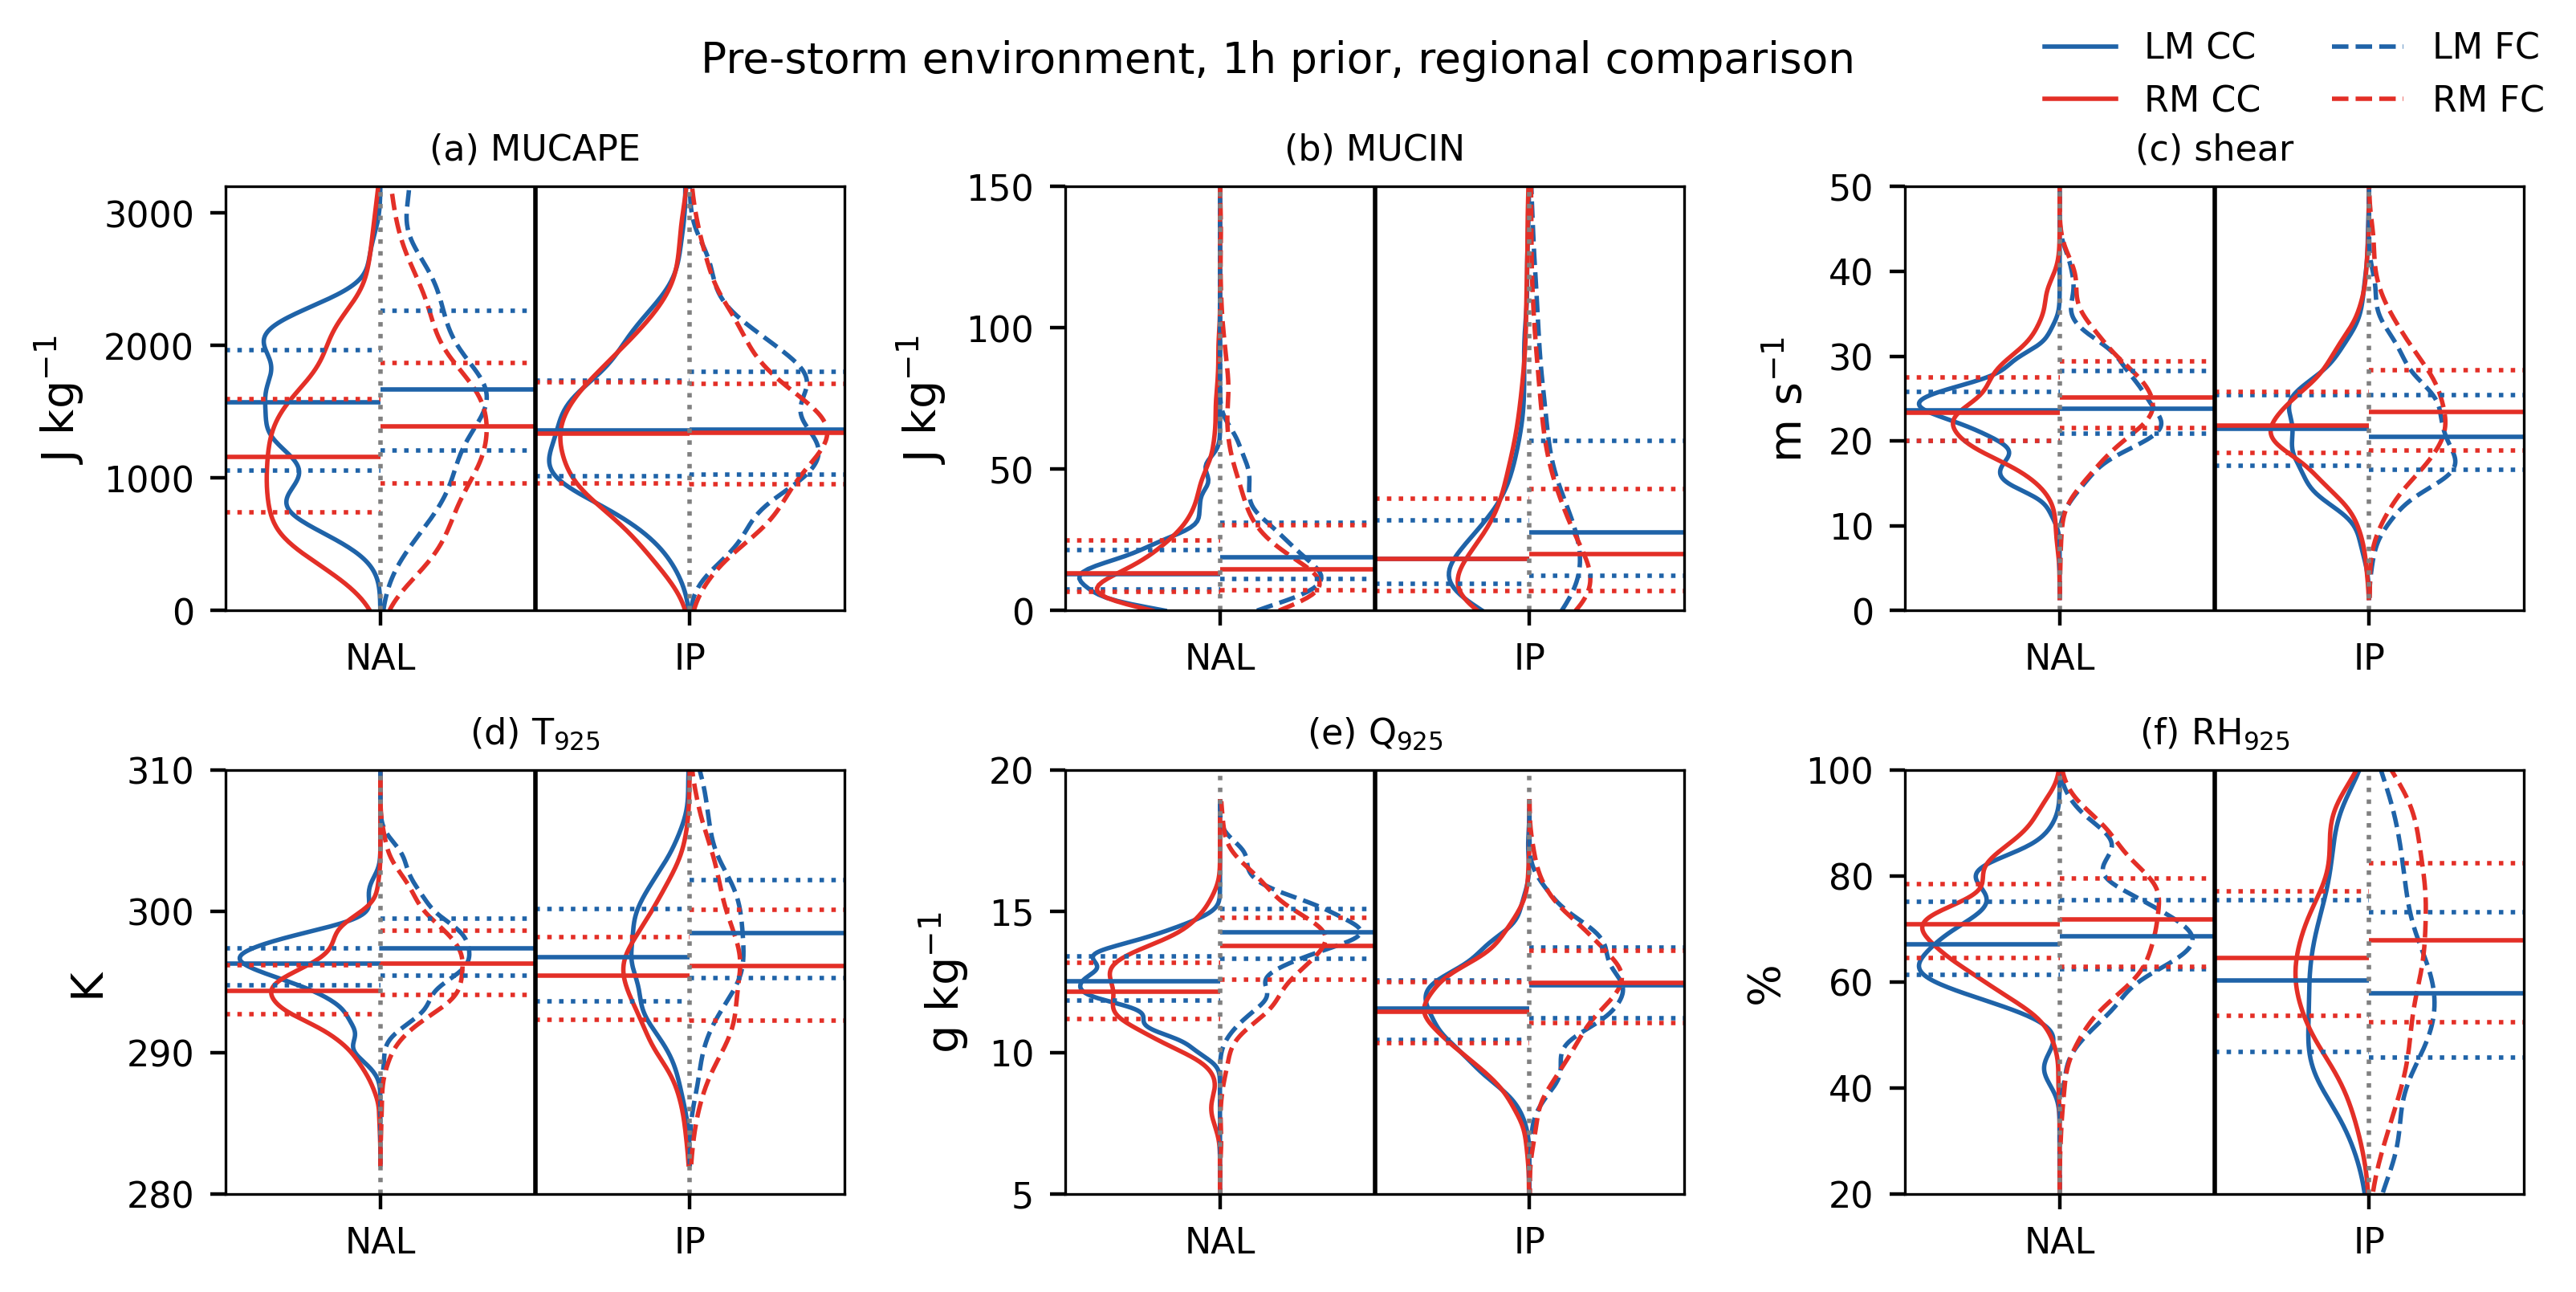

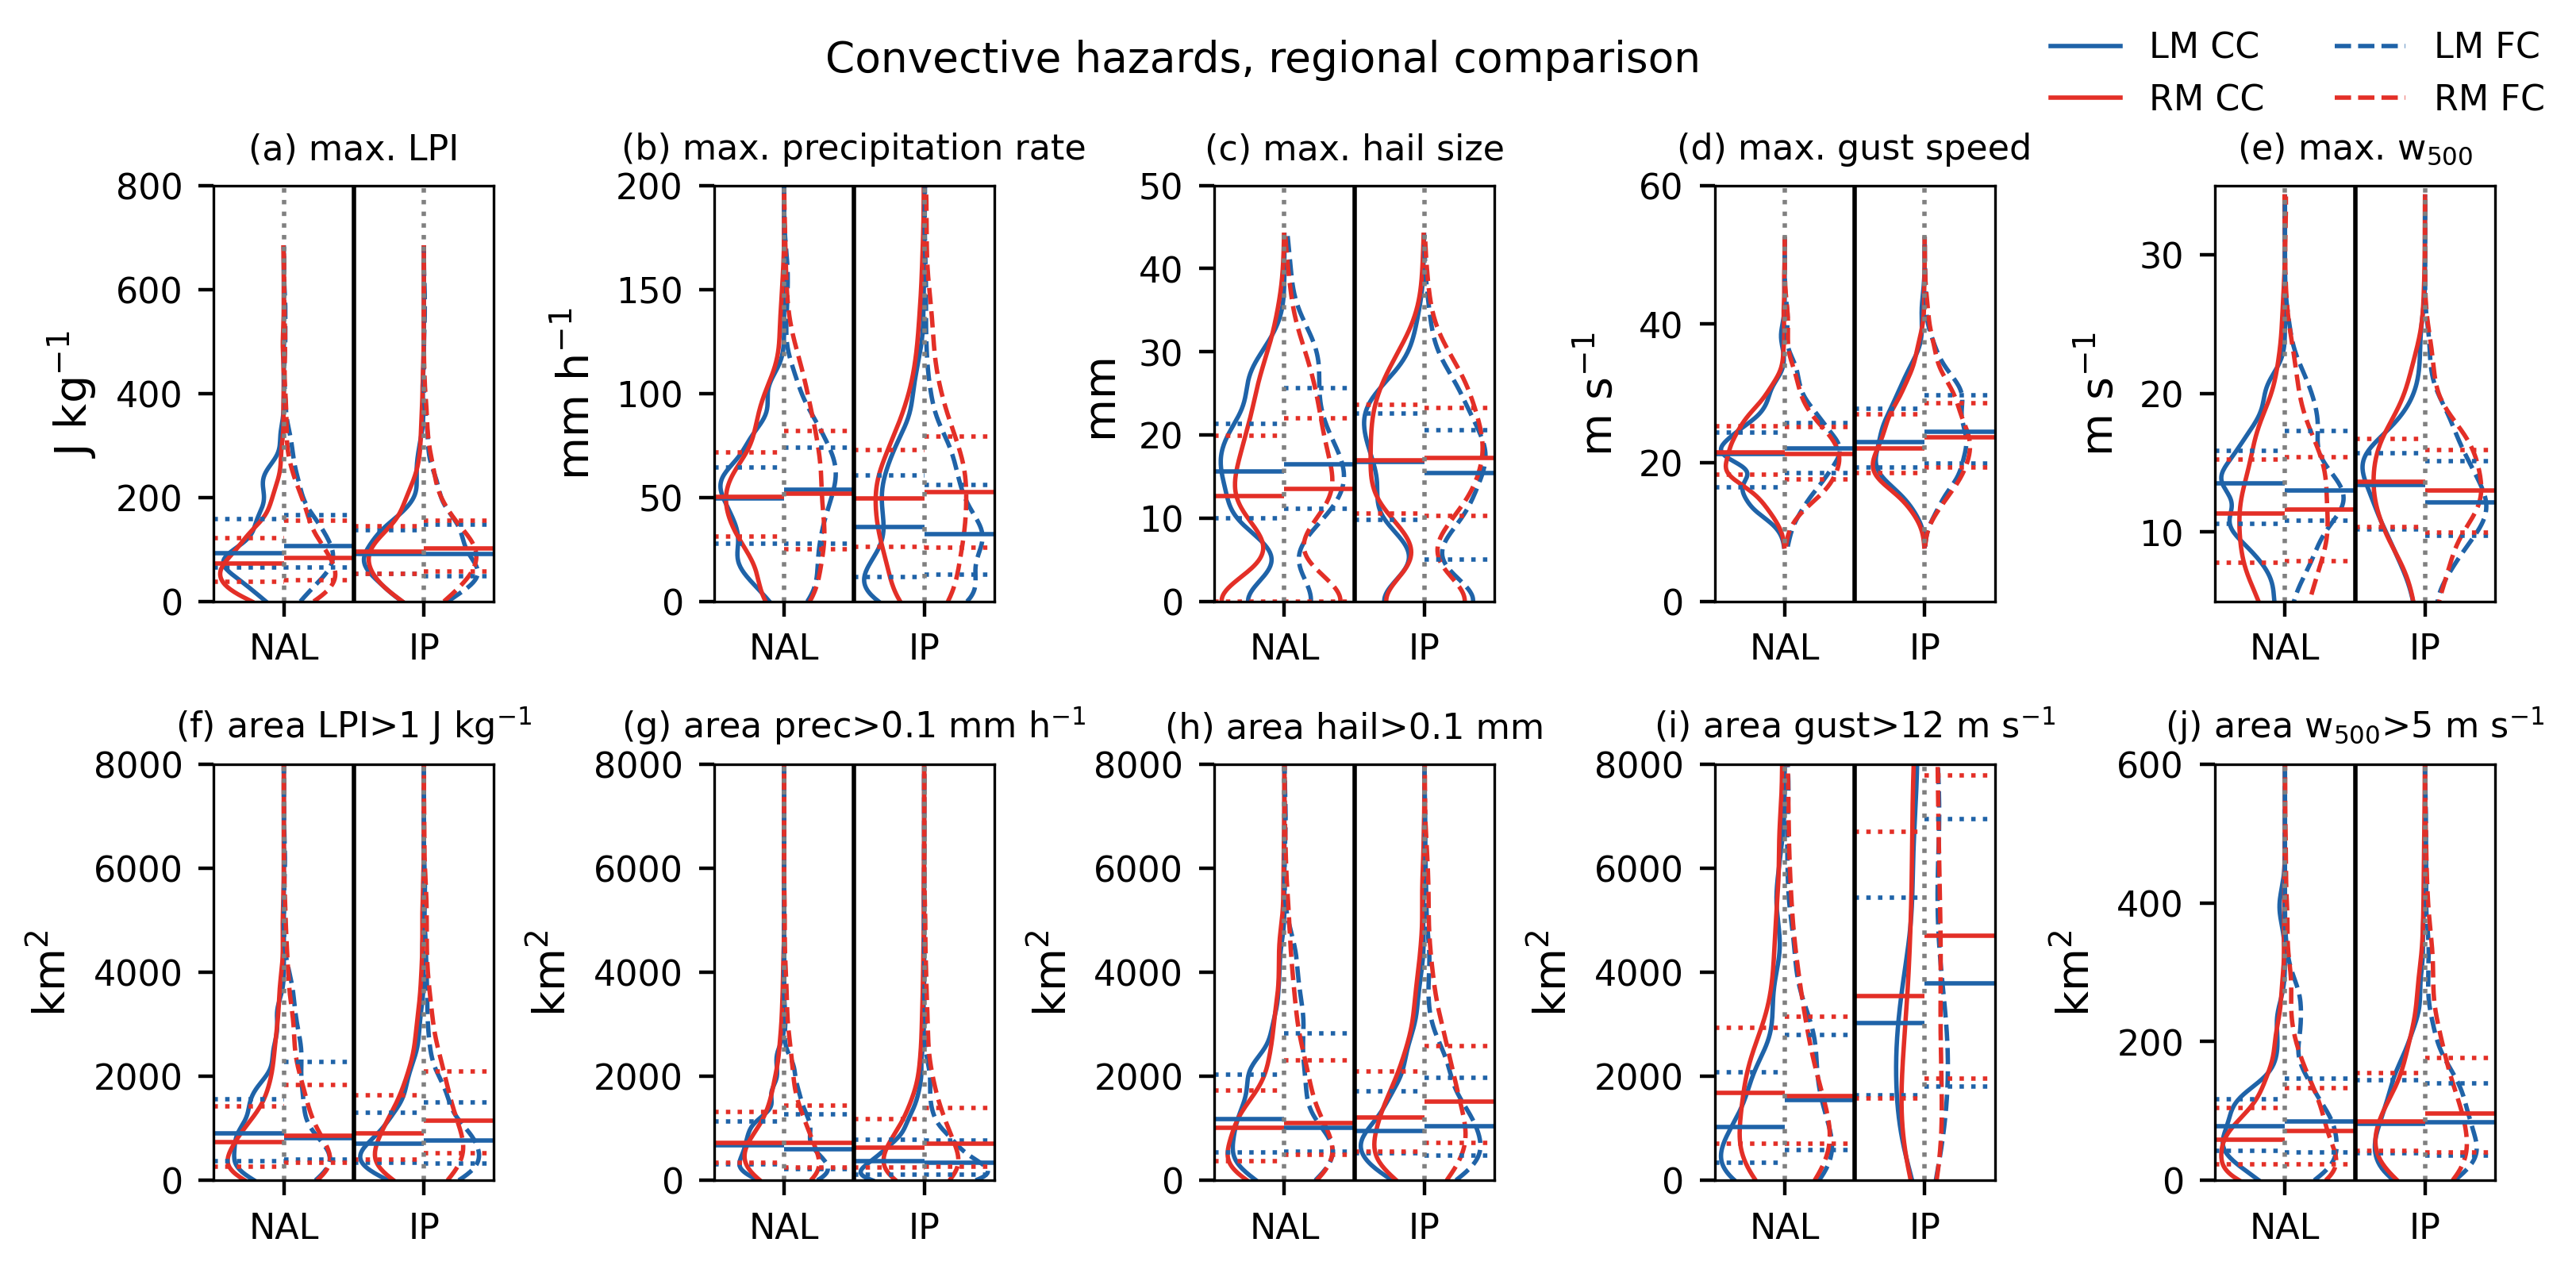

In [27]:
t = 1
reg = 'IP'

# --- Load both climates first ---
dfs_r = []
dfs_l = []

for c in [0, 1]:
    cl = 'present' if c == 0 else 'future'
    
    df_r = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_RM_td.csv')
    df_l = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_LM_td.csv')

    # Add climate column for CC vs FC tests
    df_r['climate'] = cl
    df_l['climate'] = cl

    # Add shear
    df_r['shear'] = ((df_r.U_500 - df_r.U_925)**2 + (df_r.V_500 - df_r.V_925)**2)**0.5
    df_l['shear'] = ((df_l.U_500 - df_l.U_925)**2 + (df_l.V_500 - df_l.V_925)**2)**0.5

    dfs_r.append(df_r)
    dfs_l.append(df_l)

# Combine both climates for CC vs FC tests
df_r_all_reg1 = pd.concat(dfs_r)
df_l_all_reg1 = pd.concat(dfs_l)


reg = 'NAL'

# --- Load both climates first ---
dfs_r = []
dfs_l = []

for c in [0, 1]:
    cl = 'present' if c == 0 else 'future'
    
    df_r = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_RM_td.csv')
    df_l = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_LM_td.csv')

    # Add climate column for CC vs FC tests
    df_r['climate'] = cl
    df_l['climate'] = cl

    # Add shear
    df_r['shear'] = ((df_r.U_500 - df_r.U_925)**2 + (df_r.V_500 - df_r.V_925)**2)**0.5
    df_l['shear'] = ((df_l.U_500 - df_l.U_925)**2 + (df_l.V_500 - df_l.V_925)**2)**0.5

    dfs_r.append(df_r)
    dfs_l.append(df_l)

# Combine both climates for CC vs FC tests
df_r_all_reg2 = pd.concat(dfs_r)
df_l_all_reg2 = pd.concat(dfs_l)

fig, ax = plt.subplots(2, 3, figsize=(8, 4))
fig.suptitle('Pre-storm environment, 1h prior, regional comparison')
axes = ax.flatten()

fig2, ax2 = plt.subplots(2, 5, figsize=(8, 4))
fig2.suptitle('Convective hazards, regional comparison')
axes2 = ax2.flatten()

colors = ['#1F63A8', '#E32F27']  # CC = blue, FC = red



variables_env = ['CAPE_MU', 'CIN_MU', 'shear', 'T_925', 'Q_925', 'RH_925']
units_env = ['J kg$^{-1}$','J kg$^{-1}$','m s$^{-1}$','K','g kg$^{-1}$','%']
limits_env = [[0,3200],[0,150],[0,50],[280,310],[5,20],[20,100]]
variables_haz = ['max_LPI', 'max_prec', 'max_hail', 'max_gust', 'max_W500', 'area_LPI', 'area_prec', 'area_hail', 'area_gust', 'area_W500']
units_haz = ['J kg$^{-1}$', 'mm h$^{-1}$','mm','m s$^{-1}$','m s$^{-1}$', 'km$^2$', 'km$^2$', 'km$^2$', 'km$^2$', 'km$^2$' ]
limits_haz = [[0,800],[0,200],[0,50],[0,60],[5,35],[0,8000],[0,8000],[0,8000],[0,8000],[0,600]]
titles_env = ['(a) MUCAPE', '(b) MUCIN', '(c) shear', '(d) T$_{925}$', '(e) Q$_{925}$', '(f) RH$_{925}$']
titles_haz = ['(a) max. LPI', '(b) max. precipitation rate', '(c) max. hail size', '(d) max. gust speed', '(e) max. w$_{500}$',
 '(f) area LPI>1 J kg$^{-1}$', '(g) area prec>0.1 mm h$^{-1}$', '(h) area hail>0.1 mm', '(i) area gust>12 m s$^{-1}$','(j) area w$_{500}$>5 m s$^{-1}$']

plot_density_vars_two_regions(
    axes,
    variables_env,
    df_r_all_reg1, df_l_all_reg1,
    df_r_all_reg2, df_l_all_reg2,
    units_env, limits_env, titles_env
)


plot_density_vars_two_regions(
    axes2,
    variables_haz,
    df_r_all_reg1, df_l_all_reg1,
    df_r_all_reg2, df_l_all_reg2,
    units_haz, limits_haz, titles_haz
)

# Add legend manually
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, frameon=False)
handles2, labels2 = axes2[0].get_legend_handles_labels()
fig2.legend(handles2, labels2, loc='upper right', ncol=2, frameon=False)

fig.tight_layout()
fig.savefig(figs + f'recomb_dist_env_t-{t}.png', dpi=300)

fig2.tight_layout()
fig2.savefig(figs + f'regcomb_dist_haz_t-{t}.png', dpi=300)


# fig.legend(handles, labels, loc='upper right', ncol=2, frameon=False)


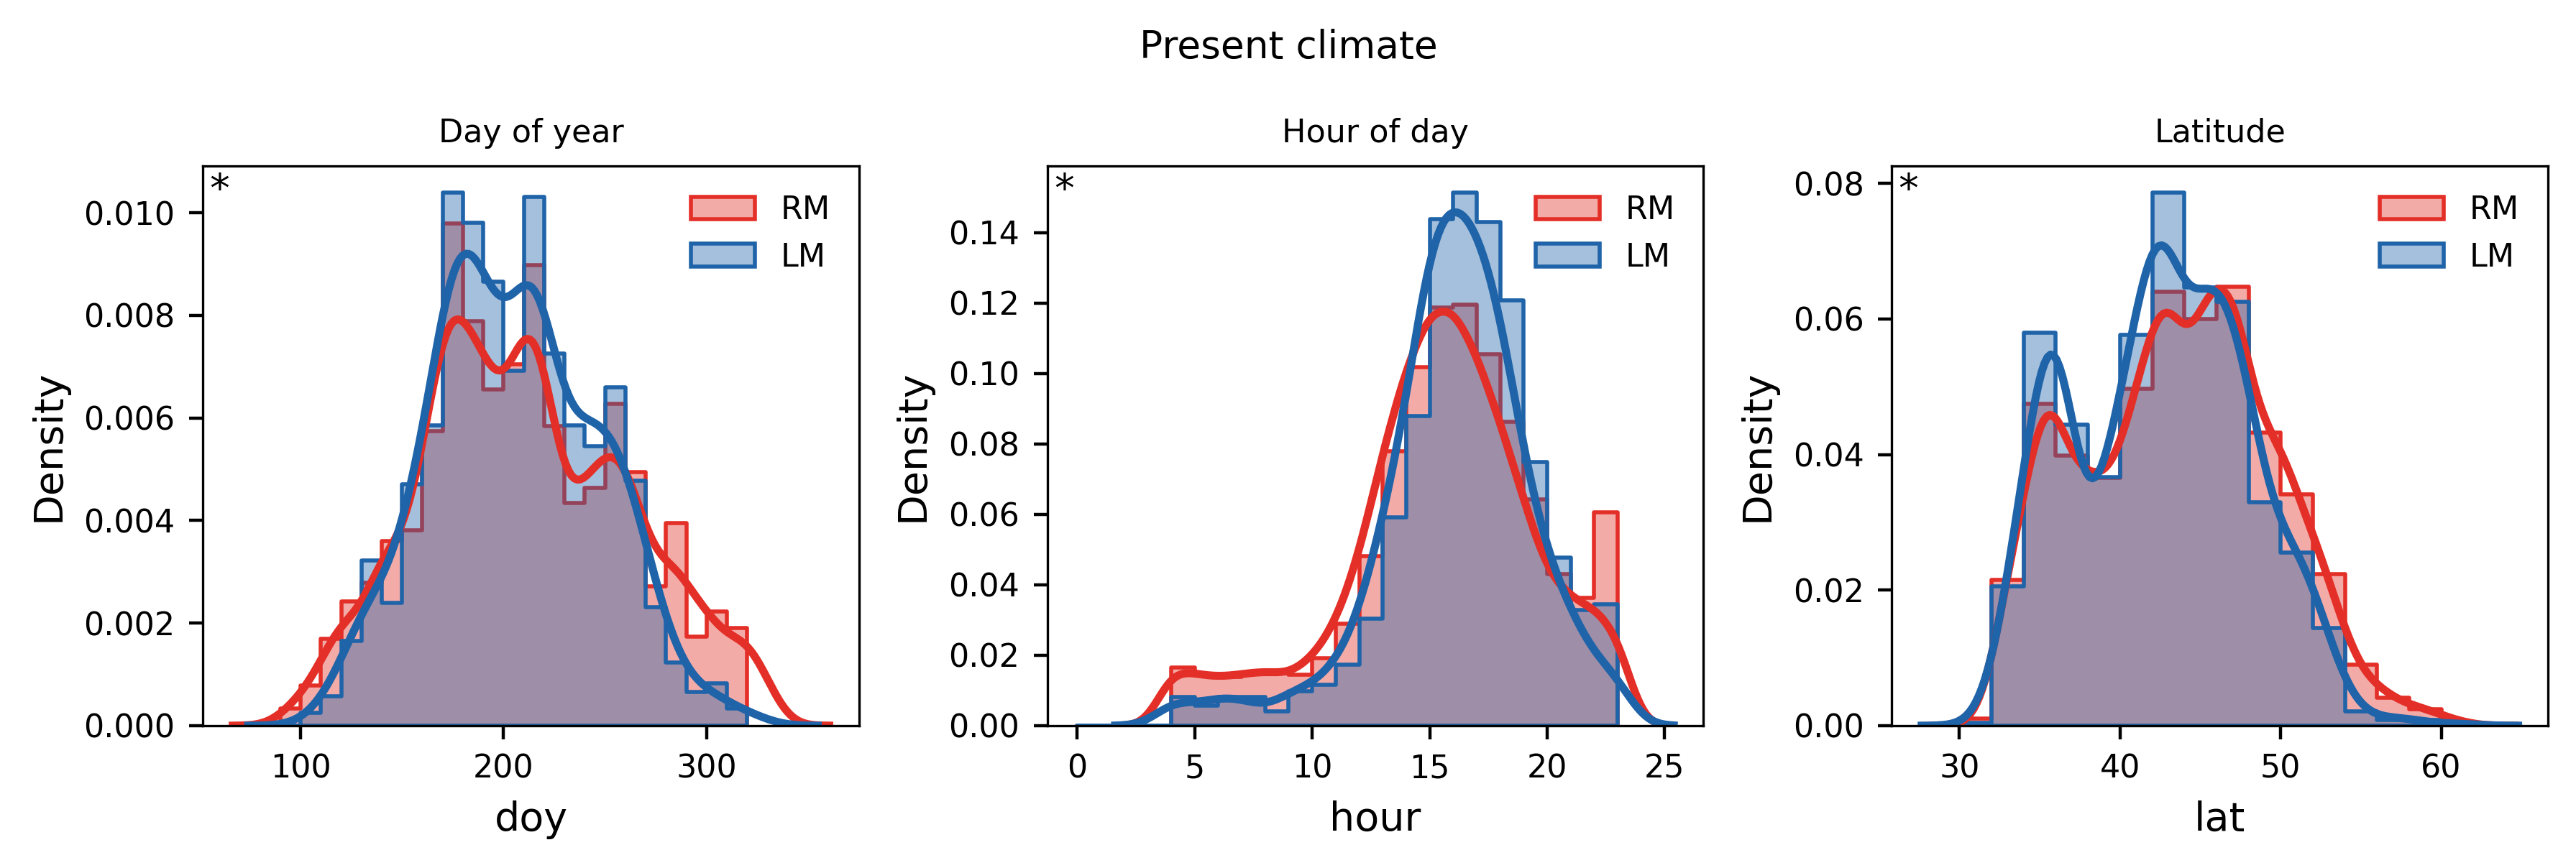

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

t = 0
c = 0
cl = 'present' if c == 0 else 'future'
reg = 'EUR'

# Load data
df_r = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_RM_td.csv')
df_l = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_LM_td.csv')
colors = ['#1F63A8', '#E32F27']  
# Extract time components
for df in [df_r, df_l]:
    times = pd.to_datetime(df.time)
    df['doy'] = times.dt.dayofyear
    df['month'] = times.dt.month
    df['hour'] = times.dt.hour

variables = ['doy', 'hour', 'lat'] 
labels = ['Day of year', 'Hour of day', 'Latitude']
binss = [np.arange(90, 330, 10), np.arange(24), np.arange(30, 61, 2)]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
plt.suptitle(f'{cl.capitalize()} climate')
axes = ax.flatten()

for ivar, var in enumerate(variables):
    # Histogram with custom bins
    sns.histplot(df_r[var].dropna(), color='#E32F27', bins=binss[ivar], stat='density',
                 element='step', ax=axes[ivar], label='RM', alpha=0.4)
    sns.histplot(df_l[var].dropna(), color='#1F63A8', bins=binss[ivar], stat='density',
                 element='step', ax=axes[ivar], label='LM', alpha=0.4)

    # Smoothed PDF curves
    sns.kdeplot(df_r[var].dropna(), color='#E32F27', ax=axes[ivar], lw=2)
    sns.kdeplot(df_l[var].dropna(), color='#1F63A8', ax=axes[ivar], lw=2)

    axes[ivar].set_title(labels[ivar])
    axes[ivar].legend()

    # Statistical test
    s, p = mannwhitneyu(df_r[var].dropna(), df_l[var].dropna())
    if p <= 0.05:
        axes[ivar].text(0.01, 0.99, '*', ha='left', va='top',
                        transform=axes[ivar].transAxes, fontsize=10, color='black')

plt.tight_layout()
plt.savefig(figs + f'pdf_{reg}_{cl}_t-{t}.png', dpi=300)


In [4]:
from metpy.calc.basic import wind_speed
from metpy.calc.thermo import mixing_ratio, saturation_vapor_pressure
from metpy.calc.tools import _remove_nans, get_layer
from metpy import constants as mpconsts
from metpy.package_tools import Exporter
from metpy.units import check_units, concatenate, units
from metpy.xarray import preprocess_and_wrap
from metpy.calc.indices import *

In [5]:


def bunkers_storm_motion_custom(pressure, u, v, height, c=7.5):
    r"""Calculate right-mover and left-mover supercell storm motions using the Bunkers method.

    This is a physically based, shear-relative, and Galilean invariant method for predicting
    supercell motion. Full atmospheric profiles of wind components, as well as pressure and
    heights, need to be provided so that calculation can properly calculate the required
    surface to 6 km mean flow.

    The calculation in summary is (from [Bunkers2000]_):

    * surface to 6 km non-pressure-weighted mean wind
    * a deviation from the sfc to 6 km mean wind of 7.5 m s−1
    * a 5.5 to 6 km mean wind for the head of the vertical wind shear vector
    * a surface to 0.5 km mean wind for the tail of the vertical wind shear vector

    Parameters
    ----------
    pressure : `pint.Quantity`
        Pressure from full profile

    u : `pint.Quantity`
        Full profile of the U-component of the wind

    v : `pint.Quantity`
        Full profile of the V-component of the wind

    height : `pint.Quantity`
        Full profile of height

    Returns
    -------
    right_mover: (`pint.Quantity`, `pint.Quantity`)
        Scalar U- and V- components of Bunkers right-mover storm motion

    left_mover: (`pint.Quantity`, `pint.Quantity`)
        Scalar U- and V- components of Bunkers left-mover storm motion

    wind_mean: (`pint.Quantity`, `pint.Quantity`)
        Scalar U- and V- components of surface to 6 km mean flow

    Examples
    --------
    >>> from metpy.calc import bunkers_storm_motion, wind_components
    >>> from metpy.units import units
    >>> p = [1000, 925, 850, 700, 500, 400] * units.hPa
    >>> h = [250, 700, 1500, 3100, 5720, 7120] * units.meters
    >>> wdir = [165, 180, 190, 210, 220, 250] * units.degree
    >>> sped = [5, 15, 20, 30, 50, 60] * units.knots
    >>> u, v = wind_components(sped, wdir)
    >>> bunkers_storm_motion(p, u, v, h)
    (<Quantity([22.09618172 12.43406736], 'knot')>,
    <Quantity([ 6.02861839 36.76517865], 'knot')>,
    <Quantity([14.06240005 24.599623  ], 'knot')>)

    Notes
    -----
    Only functions on 1D profiles (not higher-dimension vertical cross sections or grids).
    Since this function returns scalar values when given a profile, this will return Pint
    Quantities even when given xarray DataArray profiles.

    .. versionchanged:: 1.0
       Renamed ``heights`` parameter to ``height``

    """
    # remove nans from input data
    pressure, u, v, height = _remove_nans(pressure, u, v, height)

    # mean wind from sfc-6km
    wind_mean = weighted_continuous_average(pressure, u, v, height=height,
                                            depth=units.Quantity(6000, 'meter'))

    wind_mean = units.Quantity.from_list(wind_mean)

    # mean wind from sfc-500m
    wind_500m = weighted_continuous_average(pressure, u, v, height=height,
                                            depth=units.Quantity(500, 'meter'))

    wind_500m = units.Quantity.from_list(wind_500m)

    # mean wind from 5.5-6km
    wind_5500m = weighted_continuous_average(
        pressure, u, v, height=height,
        depth=units.Quantity(500, 'meter'),
        bottom=height[0] + units.Quantity(5500, 'meter'))

    wind_5500m = units.Quantity.from_list(wind_5500m)

    # Calculate the shear vector from sfc-500m to 5.5-6km
    shear = wind_5500m - wind_500m

    # Take the cross product of the wind shear and k, and divide by the vector magnitude and
    # multiply by the deviation empirically calculated in Bunkers (2000) (7.5 m/s)
    shear_cross = concatenate([shear[1], -shear[0]])
    shear_mag = np.hypot(*shear)
    rdev = shear_cross * (units.Quantity(c, 'm/s').to(u.units) / shear_mag)

    # Add the deviations to the layer average wind to get the RM motion
    right_mover = wind_mean + rdev

    # Subtract the deviations to get the LM motion
    left_mover = wind_mean - rdev

    return right_mover, left_mover, wind_mean

/storage/homefs/mf23m219/mytmp/ipykernel_1057573/985002481.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_r['U_925'][df_r.p_LCL==850]=np.nan
/storage/homefs/mf23m219/mytmp/ipykernel_1057573/985002481.py:15: SettingWithCopyWarning: 


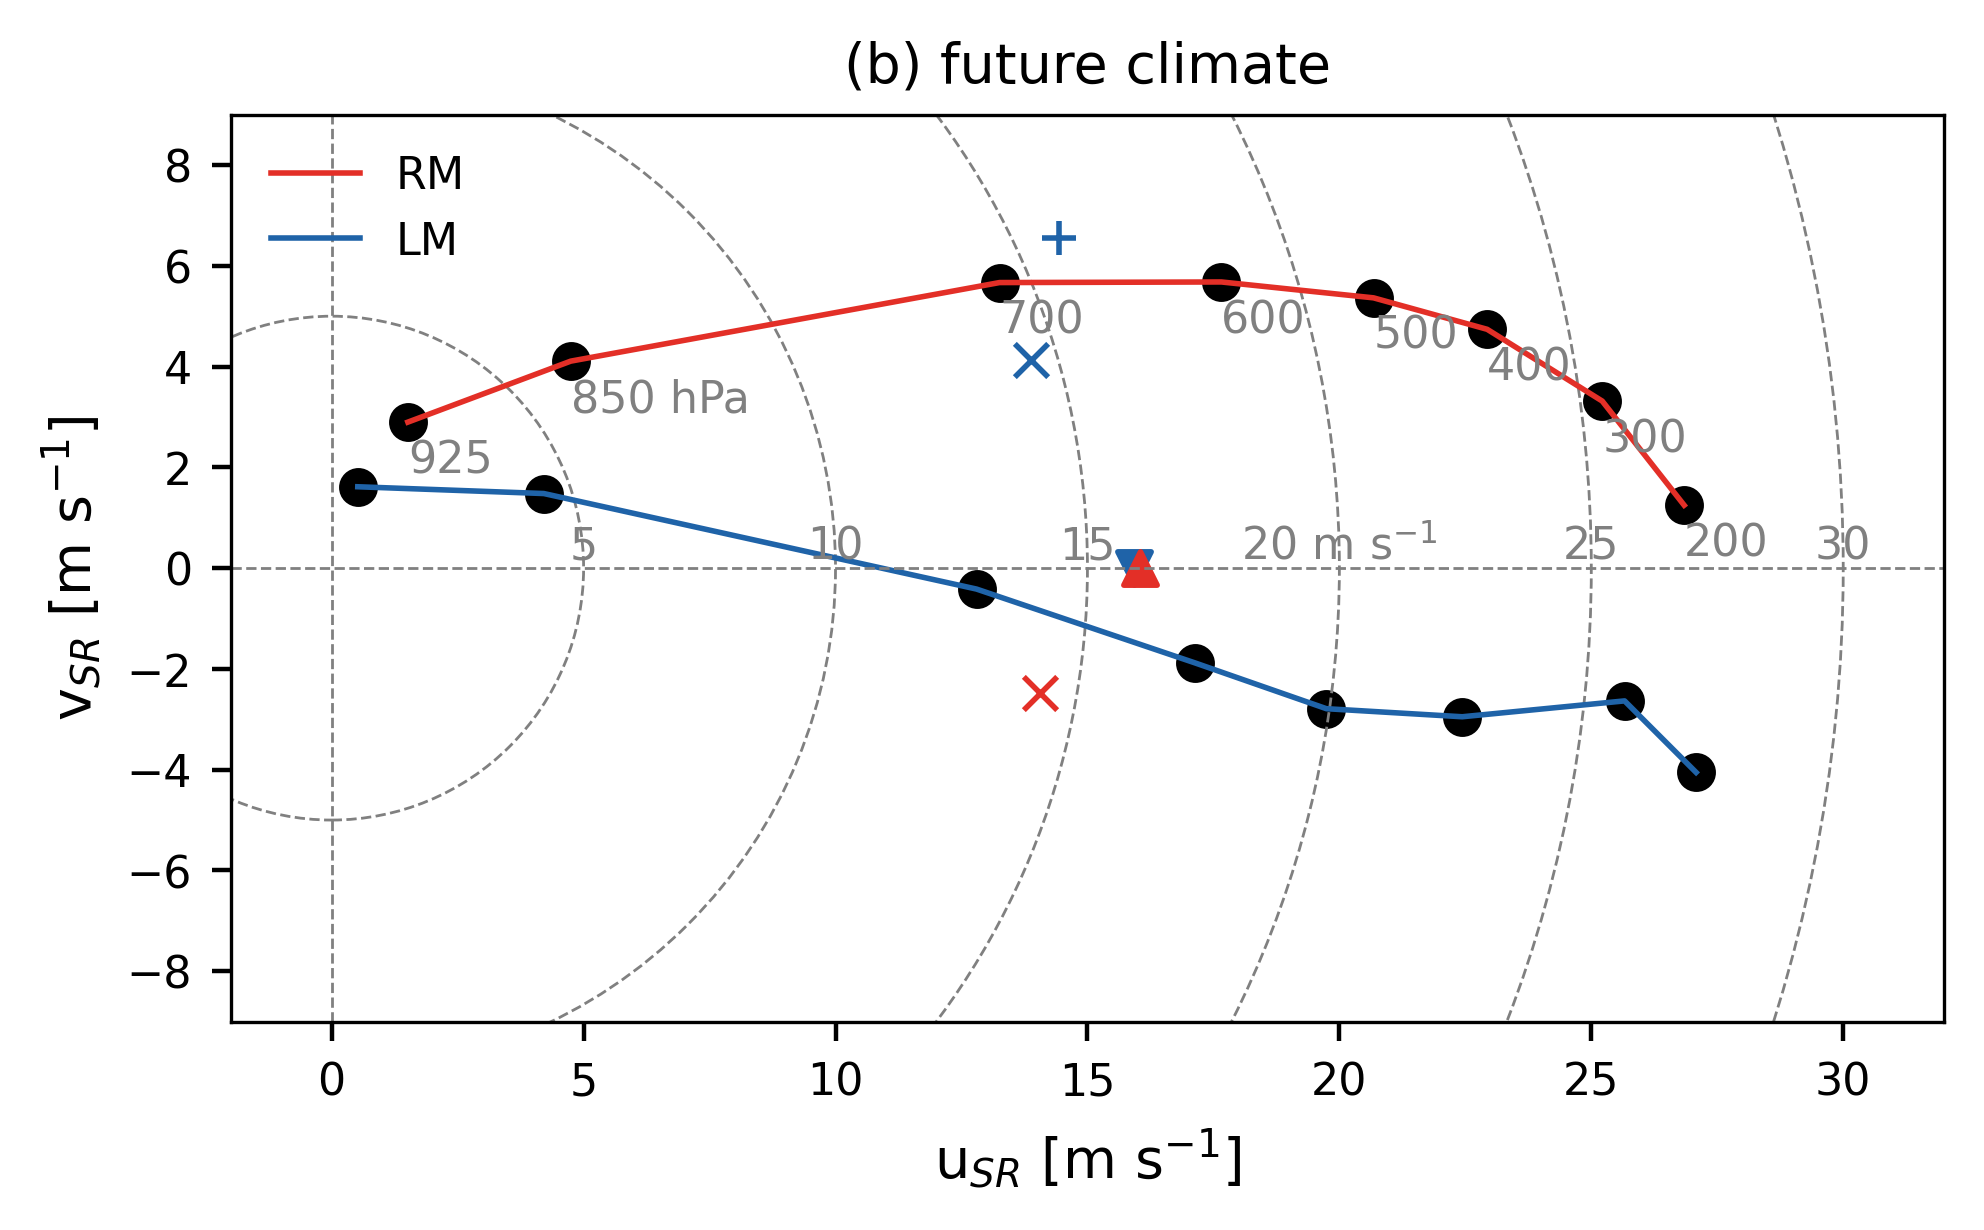

In [32]:
from metpy.calc import bunkers_storm_motion, wind_components
from metpy.units import units
colors = ['#1F63A8', '#E32F27']

t = 1
c = 1
reg='EUR'

if c==0: cl = 'present'
if c==1: cl = 'future'

df_r = pd.read_csv(data+'fulldisk_'+reg+'_'+cl+'_t-'+str(t)+'_RM_td.csv')
df_l = pd.read_csv(data+'fulldisk_'+reg+'_'+cl+'_t-'+str(t)+'_LM_td.csv')

df_r['U_925'][df_r.p_LCL==850]=np.nan

ucol_r = df_r[['U_925', 'U_850', 'U_700', 'U_600', 'U_500', 'U_400', 'U_300', 'U_200']]
vcol_r = df_r[['V_925', 'V_850', 'V_700', 'V_600', 'V_500', 'V_400', 'V_300', 'V_200']]
# hcol_r = df_r[['Z_925', 'Z_850', 'Z_700', 'Z_600', 'Z_500', 'Z_400', 'Z_300', 'Z_200']]/9.81
hcol_r = [700,1500,3000,4200,5500,7000,9000,12000]
ucol_l = df_l[['U_925', 'U_850', 'U_700', 'U_600', 'U_500', 'U_400', 'U_300', 'U_200']]
vcol_l = df_l[['V_925', 'V_850', 'V_700', 'V_600', 'V_500', 'V_400', 'V_300', 'V_200']]
# hcol_l = df_l[['Z_925', 'Z_850', 'Z_700', 'Z_600', 'Z_500', 'Z_400', 'Z_300', 'Z_200']]/9.81
hcol_l = [700,1500,3000,4200,5500,7000,9000,12000]

b_r = bunkers_storm_motion_custom([925,850,700,600,500,400,300,200] * units.hPa, np.nanmean(ucol_r,axis=0) * units('m/s'), np.nanmean(vcol_r,axis=0) * units('m/s'), hcol_r * units.meters,)[0]
b_l_n = bunkers_storm_motion_custom([925,850,700,600,500,400,300,200] * units.hPa, np.nanmean(ucol_l,axis=0) * units('m/s'), np.nanmean(vcol_l,axis=0) * units('m/s'), hcol_l * units.meters,5)[1]
b_l_d = bunkers_storm_motion_custom([925,850,700,600,500,400,300,200] * units.hPa, np.nanmean(ucol_l,axis=0) * units('m/s'), np.nanmean(vcol_l,axis=0) * units('m/s'), hcol_l * units.meters)[1]

fig, ax = plt.subplots(figsize=(5,3.2))
plt.title('(b) '+ cl + ' climate',fontsize=10)
ax.plot(np.nanmean(ucol_r,axis=0),np.nanmean(vcol_r,axis=0),c='#E32F27',label='RM')
ax.plot(np.nanmean(ucol_l,axis=0),np.nanmean(vcol_l,axis=0),c='#1F63A8',label='LM')
ax.scatter(np.nanmean(ucol_r,axis=0),np.nanmean(vcol_r,axis=0),c='k')
x = np.nanmean(ucol_r,axis=0); y = np.nanmean(vcol_r,axis=0); text = ['925','850 hPa','700','600','500','400','300','200']
for i in range(len(x)):
    ax.text(x[i],y[i]-1,text[i],c='gray')
ax.scatter(np.nanmean(ucol_l,axis=0),np.nanmean(vcol_l,axis=0),c='k')

ax.scatter(b_l_n[0].magnitude,b_l_n[1].magnitude,c='#1F63A8',marker='x')
ax.scatter(b_l_d[0].magnitude,b_l_d[1].magnitude,c='#1F63A8',marker='+')
ax.scatter(b_r[0].magnitude,b_r[1].magnitude,c='#E32F27',marker='x')
if reg=='EUR':
    lc = 15.39004857771396; rc = 15.189672740706198; lf = 15.916943243108802; rf = 16.042510110181787
    if c==0: ax.scatter(lc,0,c='#1F63A8',marker='v');ax.scatter(rc,0,c='#E32F27',marker='^')
    if c==1: ax.scatter(lf,0,c='#1F63A8',marker='v');ax.scatter(rf,0,c='#E32F27',marker='^')
for r in [5, 10, 15, 20, 25, 30]:  # Radii of the circles
    circle = patches.Circle((0, 0), r, color='gray', fill=False, linestyle='--', linewidth=0.5)
    ax.add_patch(circle)
    if r ==20: ax.text(r, 0, str(r) + ' m s$^{-1}$', va='bottom', ha='center', fontsize=8, color='gray')
    else: ax.text(r, 0, str(r), va='bottom', ha='center', fontsize=8, color='gray')

# Make sure the aspect ratio is equal
ax.set_aspect('equal')
ax.set_ylim([-9,9])
ax.set_xlim([-2,32])
ax.set_xlabel('u$_{SR}$ [m s$^{-1}$]')
ax.set_ylabel('v$_{SR}$ [m s$^{-1}$]')
ax.hlines(0,-2,32,color='gray', linestyle='--', linewidth=0.5)
ax.vlines(0,-9,9,color='gray', linestyle='--', linewidth=0.5)
ax.legend()

plt.tight_layout()

plt.savefig(figs+reg+'_hodo_'+cl+'_t-'+str(t)+'.png',dpi=300)



In [6]:
from metpy.calc import bunkers_storm_motion, wind_components
from metpy.units import units
import metpy

t = 1
c = 0
reg='EUR'

if c==0: cl = 'present'
if c==1: cl = 'future'

df_r = pd.read_csv(data+'fulldisk_'+reg+'_'+cl+'_t-'+str(t)+'_RM_td.csv')
df_l = pd.read_csv(data+'fulldisk_'+reg+'_'+cl+'_t-'+str(t)+'_LM_td.csv')

df_r['U_925'][df_r.p_LCL==850]=np.nan

ucol_r = df_r[['U_925', 'U_850', 'U_700', 'U_600', 'U_500', 'U_400', 'U_300', 'U_200']]
vcol_r = df_r[['V_925', 'V_850', 'V_700', 'V_600', 'V_500', 'V_400', 'V_300', 'V_200']]
# hcol_r = df_r[['Z_925', 'Z_850', 'Z_700', 'Z_600', 'Z_500', 'Z_400', 'Z_300', 'Z_200']]/9.81
hcol_r = [700,1500,3000,4200,5500,7000,9000,12000]
ucol_l = df_l[['U_925', 'U_850', 'U_700', 'U_600', 'U_500', 'U_400', 'U_300', 'U_200']]
vcol_l = df_l[['V_925', 'V_850', 'V_700', 'V_600', 'V_500', 'V_400', 'V_300', 'V_200']]
# hcol_l = df_l[['Z_925', 'Z_850', 'Z_700', 'Z_600', 'Z_500', 'Z_400', 'Z_300', 'Z_200']]/9.81
hcol_l = [700,1500,3000,4200,5500,7000,9000,12000]

dir_l = metpy.calc.wind_direction(np.nanmean(df_l['U_500']) * units('m/s'),np.nanmean(df_l['V_500']) * units('m/s'))
dir_r = metpy.calc.wind_direction(np.nanmean(df_r['U_500']) * units('m/s'),np.nanmean(df_r['V_500']) * units('m/s'))

print(dir_l.magnitude-270,dir_r.magnitude-270)



11.1530870148884 -15.379198733796471


/tmp/ipykernel_216329/2127815147.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_r['U_925'][df_r.p_LCL==850]=np.nan
/tmp/ipykernel_216329/2127815147.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [17]:

b_r = bunkers_storm_motion([925,850,700,600,500,400,300,200] * units.hPa, np.nanmean(ucol_r,axis=0) * units('m/s'), np.nanmean(vcol_r,axis=0) * units('m/s'), hcol_r * units.meters)[0]
b_l = bunkers_storm_motion([925,850,700,600,500,400,300,200] * units.hPa, np.nanmean(ucol_l,axis=0) * units('m/s'), np.nanmean(vcol_l,axis=0) * units('m/s'), hcol_l * units.meters)[1]

print(b_r,dir(b_l))

[14.063426311490733 -2.4713579671795163] meter / second ['T', 'UnitsContainer', '_NumpyQuantity__ito_if_needed', '_REGISTRY', '__abs__', '__add__', '__annotations__', '__array__', '__array_function__', '__array_priority__', '__array_ufunc__', '__bool__', '__bytes__', '__class__', '__class_getitem__', '__complex__', '__copy__', '__dask_graph__', '__dask_keys__', '__dask_optimize__', '__dask_postcompute__', '__dask_postpersist__', '__dask_scheduler__', '__dask_tokenize__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__firstlineno__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '

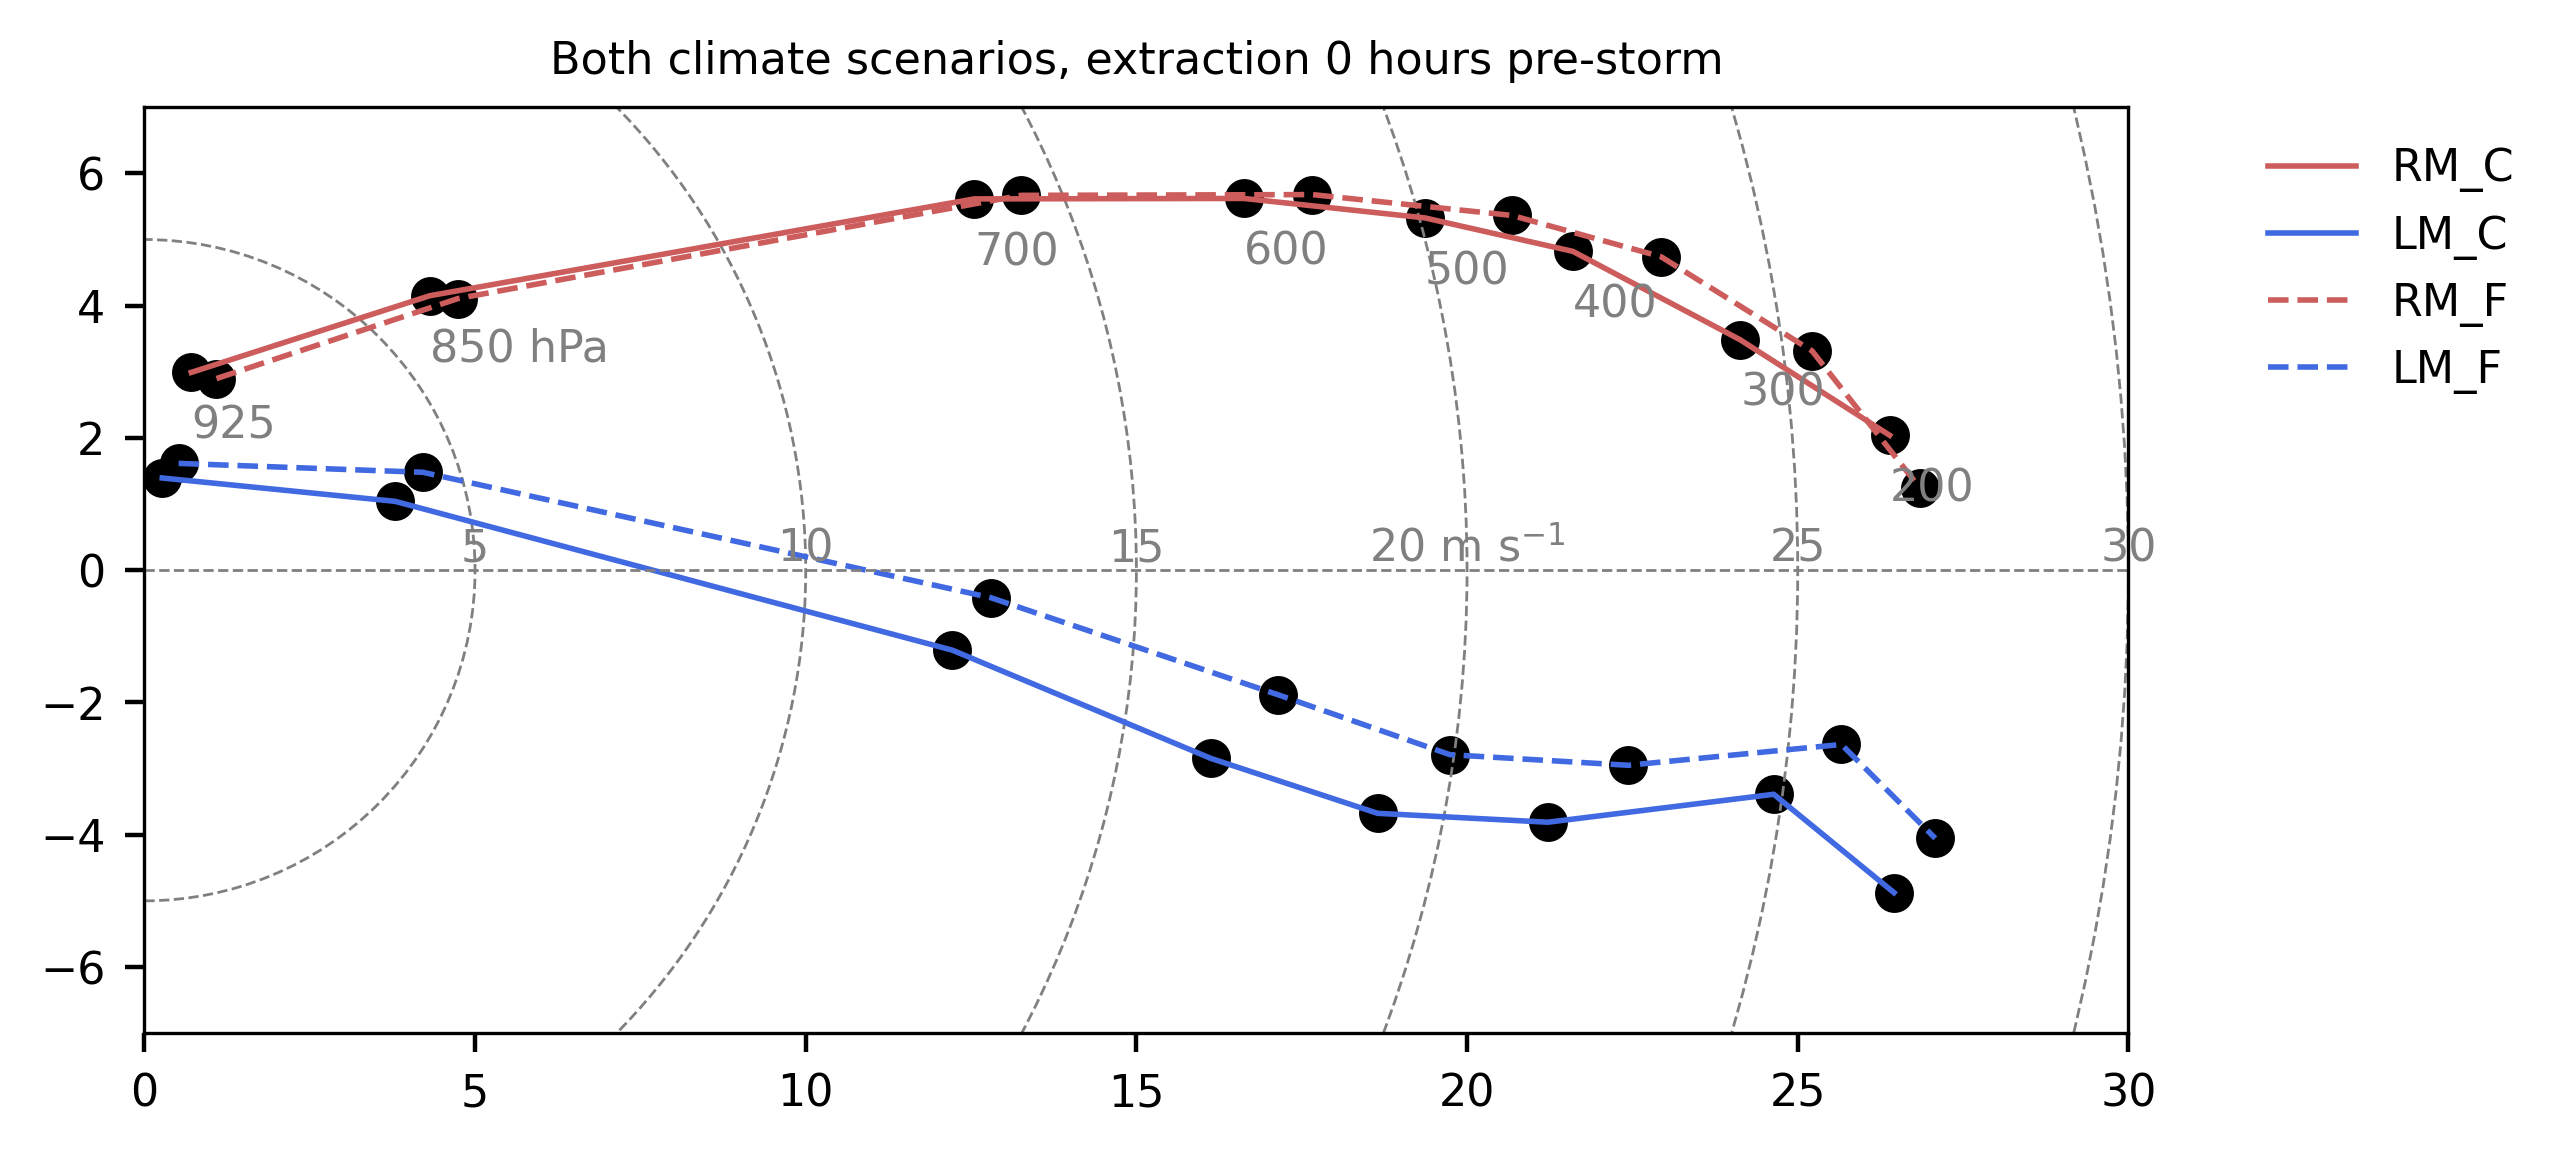

In [28]:
df_r_c = pd.read_csv(data+'fulldisk_EUR_present_t-'+str(t)+'_RM_td.csv')
df_l_c = pd.read_csv(data+'fulldisk_EUR_present_t-'+str(t)+'_LM_td.csv')

df_r_f = pd.read_csv(data+'fulldisk_EUR_future_t-'+str(t)+'_RM_td.csv')
df_l_f = pd.read_csv(data+'fulldisk_EUR_future_t-'+str(t)+'_LM_td.csv')

ucol_r_c0 = df_r_c[['U_925', 'U_850', 'U_700', 'U_600', 'U_500', 'U_400', 'U_300', 'U_200']]
vcol_r_c0 = df_r_c[['V_925', 'V_850', 'V_700', 'V_600', 'V_500', 'V_400', 'V_300', 'V_200']]
ucol_l_c0 = df_l_c[['U_925', 'U_850', 'U_700', 'U_600', 'U_500', 'U_400', 'U_300', 'U_200']]
vcol_l_c0 = df_l_c[['V_925', 'V_850', 'V_700', 'V_600', 'V_500', 'V_400', 'V_300', 'V_200']]

ucol_r_f0 = df_r_f[['U_925', 'U_850', 'U_700', 'U_600', 'U_500', 'U_400', 'U_300', 'U_200']]
vcol_r_f0 = df_r_f[['V_925', 'V_850', 'V_700', 'V_600', 'V_500', 'V_400', 'V_300', 'V_200']]
ucol_l_f0 = df_l_f[['U_925', 'U_850', 'U_700', 'U_600', 'U_500', 'U_400', 'U_300', 'U_200']]
vcol_l_f0 = df_l_f[['V_925', 'V_850', 'V_700', 'V_600', 'V_500', 'V_400', 'V_300', 'V_200']]

fig, ax = plt.subplots()
plt.title('Both climate scenarios, extraction 0 hours pre-storm')
ax.plot(np.nanmean(ucol_r_c0,axis=0),np.nanmean(vcol_r_c0,axis=0),c='indianred',label='RM_C')
ax.plot(np.nanmean(ucol_l_c0,axis=0),np.nanmean(vcol_l_c0,axis=0),c='royalblue',label='LM_C')

ax.plot(np.nanmean(ucol_r_f0,axis=0),np.nanmean(vcol_r_f0,axis=0),c='indianred',label='RM_F',linestyle='--')
ax.plot(np.nanmean(ucol_l_f0,axis=0),np.nanmean(vcol_l_f0,axis=0),c='royalblue',label='LM_F',linestyle='--')

ax.scatter(np.nanmean(ucol_r_c0,axis=0),np.nanmean(vcol_r_c0,axis=0),c='k')
ax.scatter(np.nanmean(ucol_l_c0,axis=0),np.nanmean(vcol_l_c0,axis=0),c='k')
ax.scatter(np.nanmean(ucol_r_f0,axis=0),np.nanmean(vcol_r_f0,axis=0),c='k')
ax.scatter(np.nanmean(ucol_l_f0,axis=0),np.nanmean(vcol_l_f0,axis=0),c='k')
x = np.nanmean(ucol_r_c0,axis=0); y = np.nanmean(vcol_r_c0,axis=0); text = ['925','850 hPa','700','600','500','400','300','200']
for i in range(len(x)):
    ax.text(x[i],y[i]-1,text[i],c='gray')
# ax.scatter(np.nanmean(ucol_l,axis=0),np.nanmean(vcol_l,axis=0),c='k')
for r in [5, 10, 15, 20, 25, 30]:  # Radii of the circles
    circle = patches.Circle((0, 0), r, color='gray', fill=False, linestyle='--', linewidth=0.5)
    ax.add_patch(circle)
    if r ==20: ax.text(r, 0, str(r) + ' m s$^{-1}$', va='bottom', ha='center', fontsize=8, color='gray')
    else: ax.text(r, 0, str(r), va='bottom', ha='center', fontsize=8, color='gray')

# Make sure the aspect ratio is equal
ax.set_aspect('equal')
ax.set_ylim([-7,7])
ax.set_xlim([0,30])
ax.hlines(0,0,30,color='gray', linestyle='--', linewidth=0.5)
ax.legend(bbox_to_anchor=(1.05,1))
# plt.tight_layout
plt.savefig(figs+'hodo_t1.png',dpi=300, bbox_inches='tight')


[295.5043809310306 290.95416744983083 280.47493750056367 272.21322651747465 263.0816920011274 251.87597516234496 236.91565523224352 220.3287728985344] kelvin [16.90241340381406 13.335547881876654 3.419684830504207 -6.15558153171954 -18.98196510847911 -31.247412538201566 -44.20143569071192 -63.65632400826405] degree_Celsius [0.0025818039312857145 0.003465390855125 0.0040389062449999995 ... 0.0038177519472499992 0.003591509266375 0.002757611482875] dimensionless [297.21202578838177 292.4942861966102 281.6138083118644 273.1493177559322 263.75944955932204 252.39895719322033 237.4674395661017 220.99884303728814] kelvin [17.152693904626158 13.869897262342066 4.28926704055871 -5.803056127869331 -19.648162988507465 -32.019216976766394 -44.65646900124268 -63.64935740058898] degree_Celsius [0.00361181675925 0.003639473005625 0.002170686036857143 ... 0.0040835835287499995 0.0035961821455000004 0.003734015887625] dimensionless
853.5137553093933 hectopascal
835.6341779997615 hectopascal


/storage/homefs/mf23m219/.conda/envs/jupyter/lib/python3.13/site-packages/metpy/calc/thermo.py:1403: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/storage/homefs/mf23m219/.conda/envs/jupyter/lib/python3.13/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


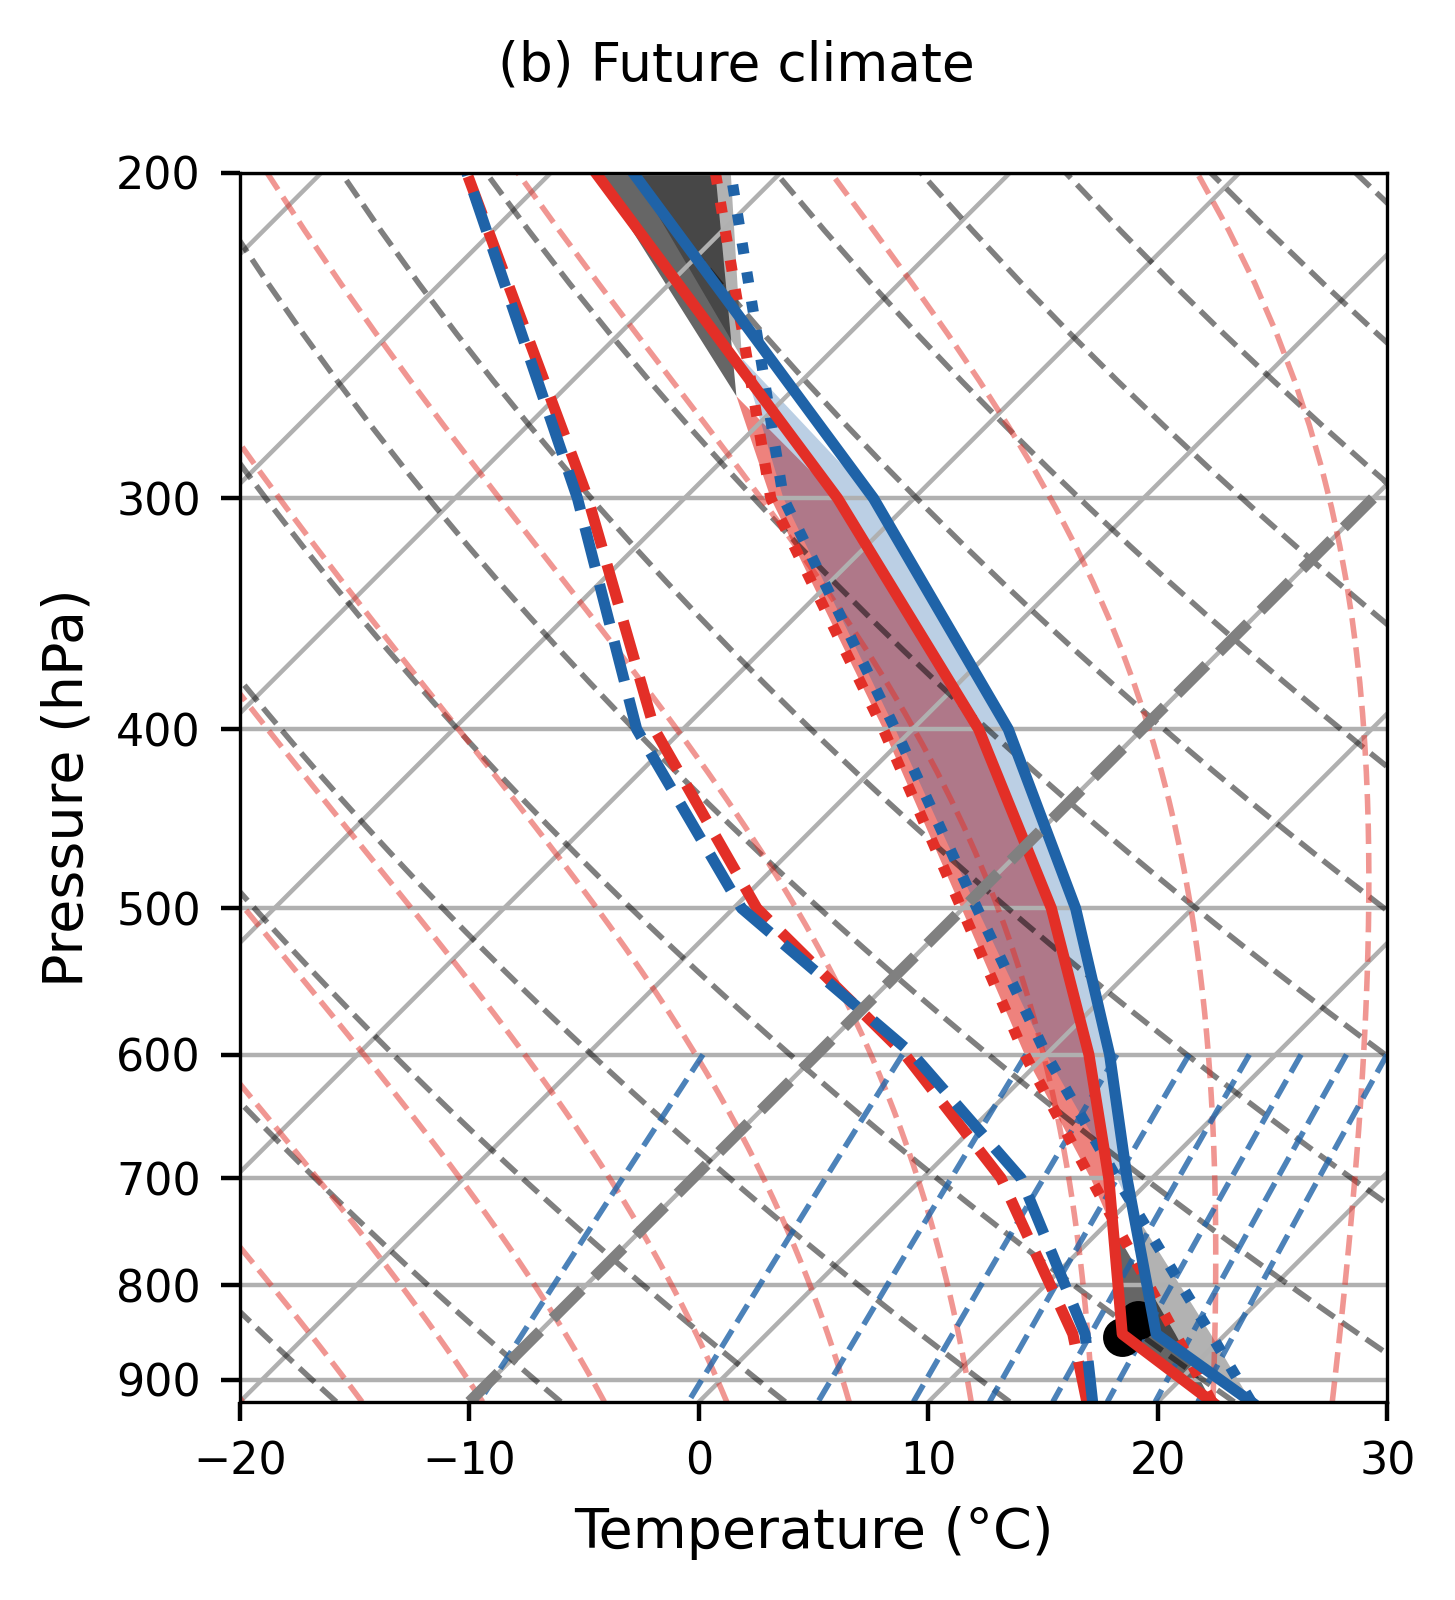

In [9]:
t = 1
c = 1
reg='EUR'
colors = ['#1F63A8', '#E32F27']
if c==0: cl = 'present'
if c==1: cl = 'future'

df_r = pd.read_csv(data+'fulldisk_'+reg+'_'+cl+'_t-'+str(t)+'_RM_td.csv')
# df_r = df_r.applymap(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) and x.startswith('[') and x.endswith(']') else x)
df_l = pd.read_csv(data+'fulldisk_'+reg+'_'+cl+'_t-'+str(t)+'_LM_td.csv')
# df_l = df_l.apply(pd.to_numeric, errors='ignore')

pvals = (925,850,700,600,500,400,300,200) * units.hPa
tcol_r = df_r[['T_925', 'T_850', 'T_700', 'T_600', 'T_500', 'T_400', 'T_300', 'T_200']]
qcol_r = df_r[['Q_925', 'Q_850', 'Q_700', 'Q_600', 'Q_500', 'Q_400', 'Q_300', 'Q_200']]
tcolr = tcol_r.values * units.K
qcolr = qcol_r.values * units.kg/units.kg
tdcolr = mp.calc.dewpoint_from_specific_humidity(pvals, qcolr)

tcol_l = df_l[['T_925', 'T_850', 'T_700', 'T_600', 'T_500', 'T_400', 'T_300', 'T_200']]
qcol_l = df_l[['Q_925', 'Q_850', 'Q_700', 'Q_600', 'Q_500', 'Q_400', 'Q_300', 'Q_200']]
tcoll = tcol_l.values * units.K
qcoll = qcol_l.values * units.kg/units.kg
tdcoll = dewpoint_from_specific_humidity(pvals, qcoll)

Td_r = np.nanmean(tdcolr,axis=0)
T_r = np.nanmean(tcolr,axis=0)

Td_l = np.nanmean(tdcoll,axis=0)
T_l = np.nanmean(tcoll,axis=0)

fig = plt.figure(figsize=(4,4))
skew = SkewT(fig, rotation=45)

skew.ax.set_ylim(925, 200)
skew.ax.set_xlim(-20, 30)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(pvals, T_r, '#E32F27',linestyle=':',linewidth=2)
skew.plot(pvals, Td_r, '#E32F27',linestyle='--',linewidth=2)

skew.plot(pvals, T_l, '#1F63A8',linestyle=':',linewidth=2)
skew.plot(pvals, Td_l, '#1F63A8',linestyle='--',linewidth=2)


# Set some better labels than the default
skew.ax.set_xlabel(f'Temperature (°C)')
skew.ax.set_ylabel(f'Pressure ({pvals.units:~P})')

# Calculate LCL height and plot as black dot. Because `p`'s first value is
# ~1000 mb and its last value is ~250 mb, the `0` index is selected for
# `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
# i.e. start from low value, 250 mb, to a high value, 1000 mb, the `-1` index
# should be selected.
print(T_r,Td_r,np.nanmean(qcolr,axis=1),T_l,Td_l,np.nanmean(qcoll,axis=1))
lcl_pressure, lcl_temperature = mpcalc.lcl(pvals[0], T_r[0], Td_r[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
print(lcl_pressure)
lcl_pressure, lcl_temperature = mpcalc.lcl(pvals[0], T_l[0], Td_l[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
print(lcl_pressure)
# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(pvals, T_r[0], Td_r[0]).to('degC')
skew.plot(pvals, prof, '#E32F27', linestyle='-', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(pvals, T_r, prof,facecolor='black',alpha=0.6)
skew.shade_cape(pvals, T_r, prof,facecolor='#E32F27',alpha=0.6)

# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(pvals, T_l[0], Td_l[0]).to('degC')
skew.plot(pvals, prof, '#1F63A8',linestyle='-',linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(pvals, T_l, prof,facecolor='black',alpha=0.3)
skew.shade_cape(pvals, T_l, prof,facecolor='#1F63A8',alpha=0.3)

# An example of a slanted line at constant T -- in this case the 0
# isotherm
skew.ax.axvline(-10, color='gray', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats(
    t0=np.arange(-30, 210, 10) * units.degC,
    colors='black', linewidth=1
)
skew.plot_moist_adiabats(
    t0=np.arange(-30, 55, 5) * units.degC,
    colors='#E32F27', linewidth=1
)
skew.plot_mixing_lines(
    mixing_ratio=np.arange(0, 20, 2) * units('g/kg'),
    colors='#1F63A8', linewidth=1
)

plt.suptitle('(b) Future climate')

plt.tight_layout()

# Show the plot
plt.savefig(figs+reg+'_skewT_'+cl+'_t-'+str(t)+'.png',dpi=300)






In [49]:
t = 1
c = 1
reg='EUR'

if c==0: cl = 'present'
if c==1: cl = 'future'

df_r = pd.read_csv(data+'fulldisk_'+reg+'_present_t-'+str(t)+'_LM_td.csv')
df_l = pd.read_csv(data+'fulldisk_'+reg+'_future_t-'+str(t)+'_LM_td.csv')

pvals = (925,850,700,600,500,400,300,200) * units.hPa
tcol_r = df_r[['T_925', 'T_850', 'T_700', 'T_600', 'T_500', 'T_400', 'T_300', 'T_200']]
qcol_r = np.nanmean(df_r[['Q_925', 'Q_850', 'Q_700', 'Q_600', 'Q_500', 'Q_400', 'Q_300', 'Q_200']],axis=0)*1000
qcol_l = np.nanmean(df_l[['Q_925', 'Q_850', 'Q_700', 'Q_600', 'Q_500', 'Q_400', 'Q_300', 'Q_200']],axis=0)*1000
print(qcol_l-qcol_r)

[1.3831683  1.30442121 1.04146961 0.80783916 0.36358066 0.14609891
 0.0579159  0.01334428]


0      11.301644
1       6.292760
2      13.569742
3       9.025101
4       9.773584
         ...    
291     6.487119
292     7.913859
293     7.836386
294     8.249774
295    12.200051
Name: q90_W500, Length: 296, dtype: float64


(array([ 9., 22., 34., 50., 46., 56., 24., 27.,  4.,  7.]),
 array([ 5.12450171,  6.46250522,  7.80050873,  9.13851224, 10.47651575,
        11.81451926, 13.15252277, 14.49052629, 15.8285298 , 17.16653331,
        18.50453682]),
 <BarContainer object of 10 artists>)

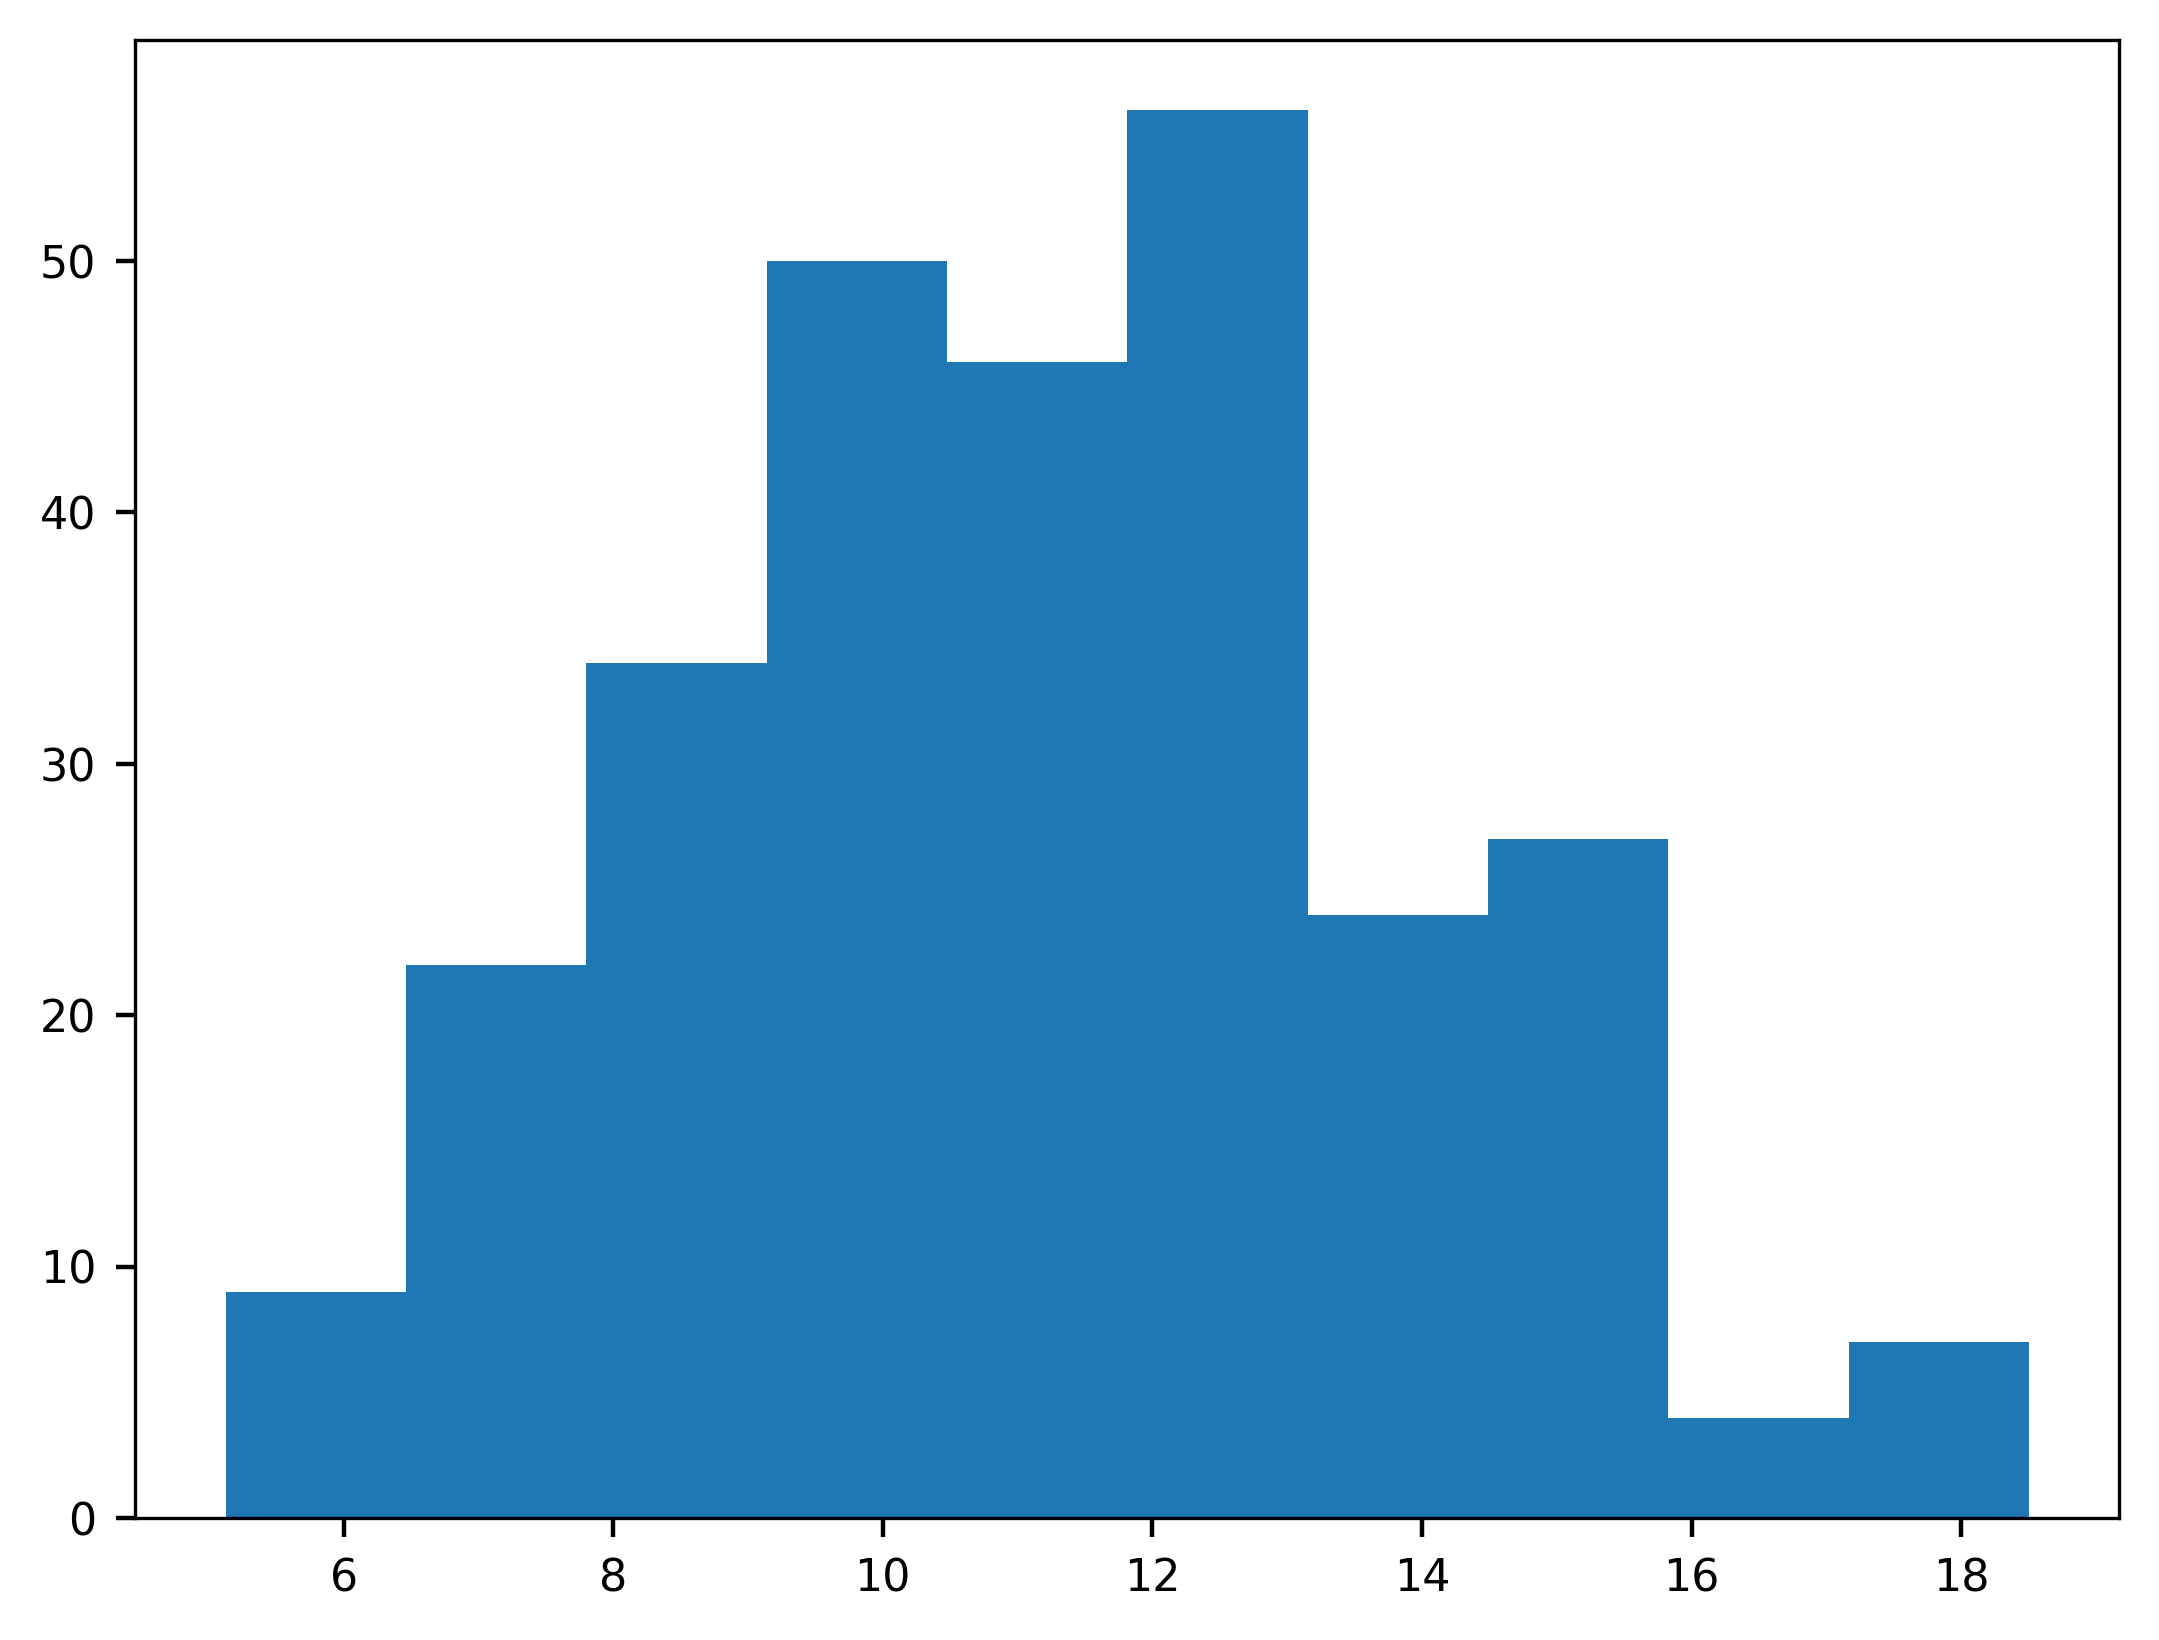

In [50]:
t = 1
c = 1
reg='IP'

if c==0: cl = 'present'
if c==1: cl = 'future'

df_r = pd.read_csv(data+'fulldisk_'+reg+'_present_t-'+str(t)+'_LM_td.csv')
df_l = pd.read_csv(data+'fulldisk_'+reg+'_future_t-'+str(t)+'_LM_td.csv')

print(df_r.q90_W500)

plt.hist(df_r.q90_W500)

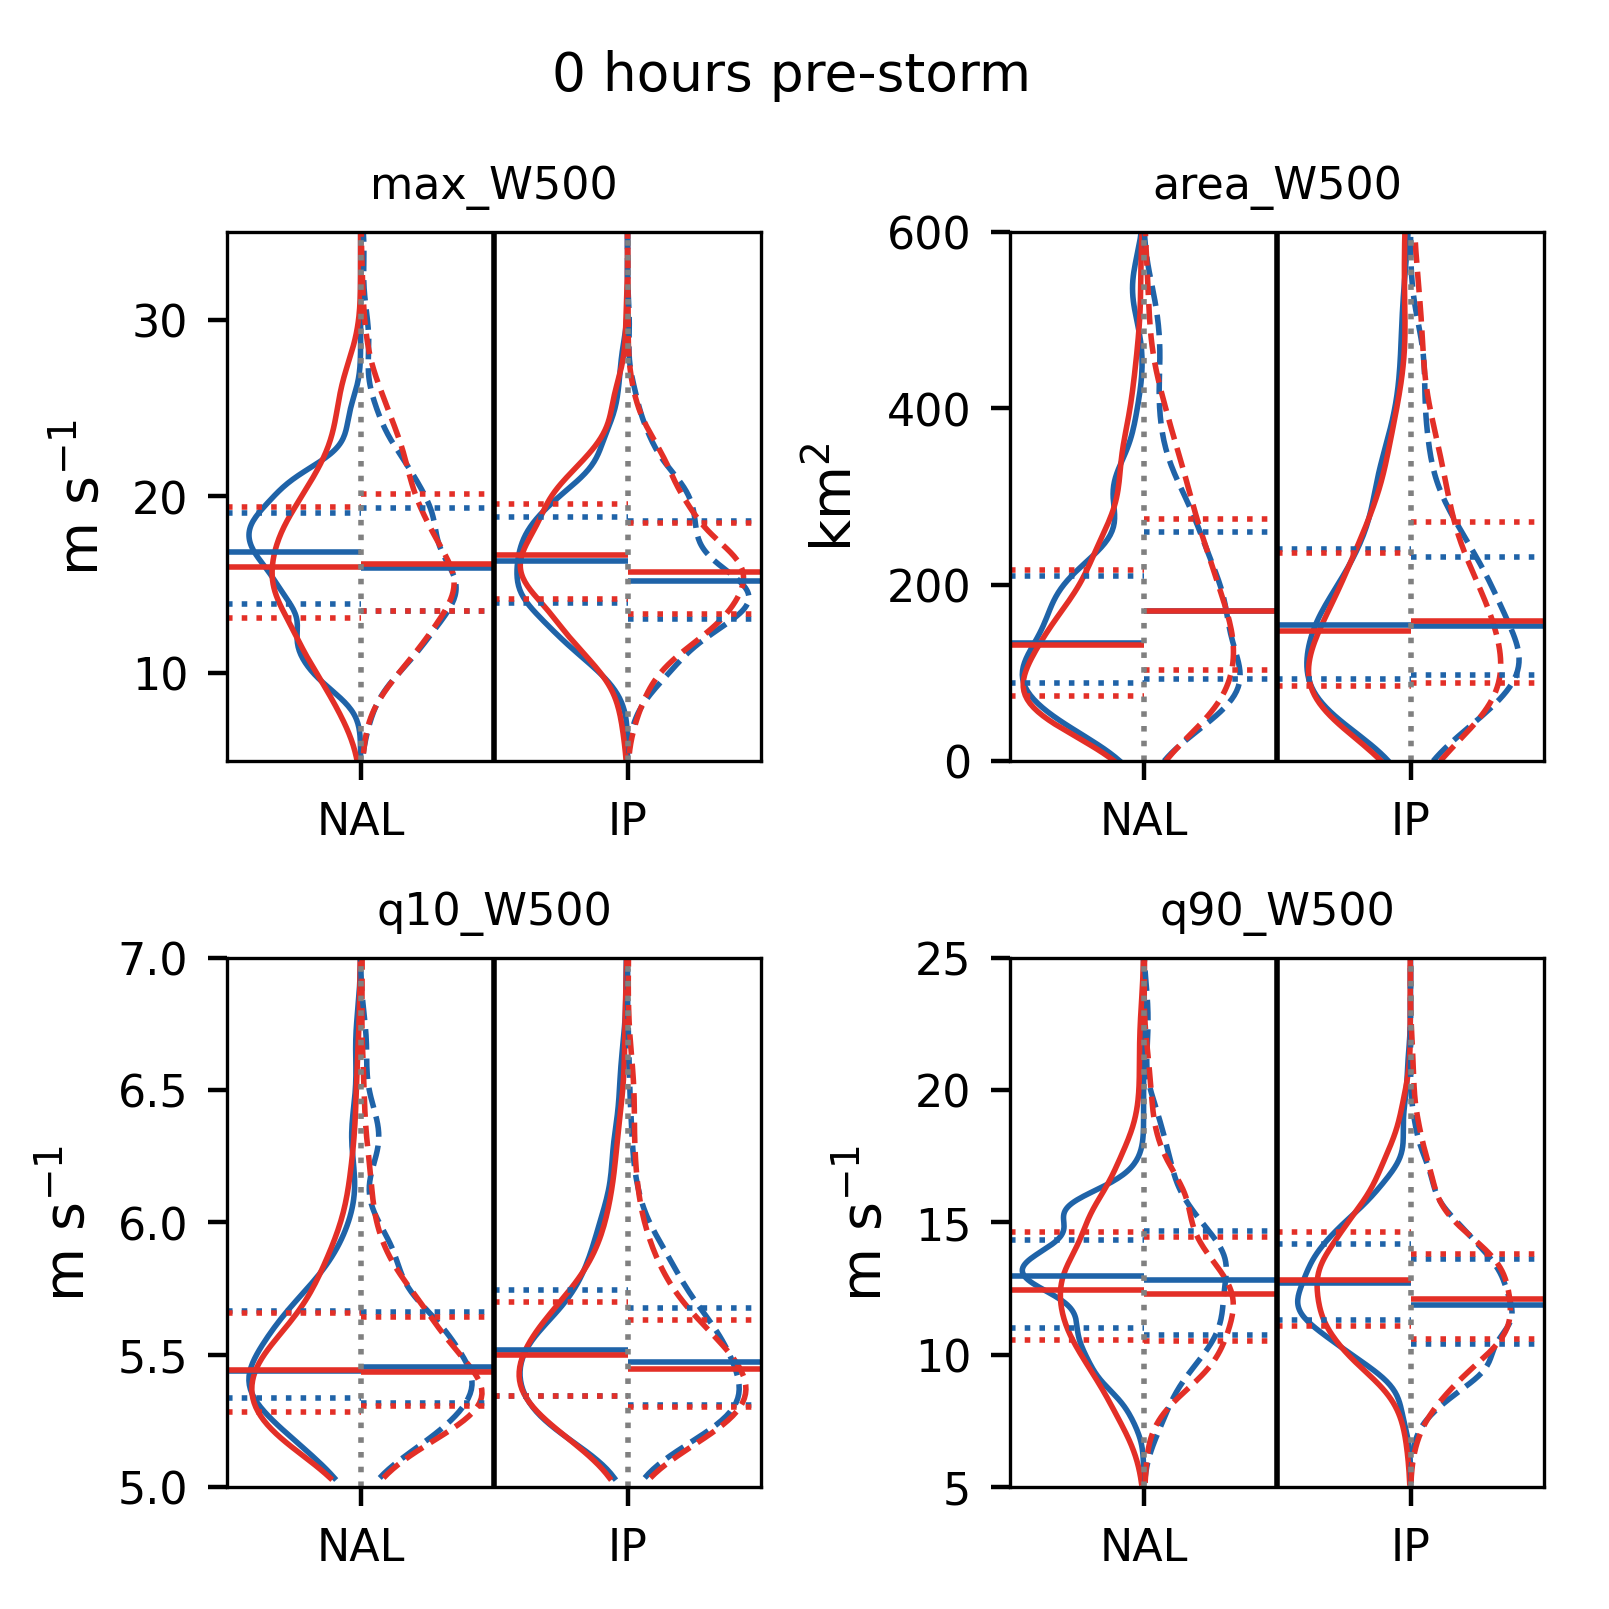

In [53]:
t = 0
reg = 'IP'

# --- Load both climates first ---
dfs_r = []
dfs_l = []

for c in [0, 1]:
    cl = 'present' if c == 0 else 'future'
    
    df_r = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_RM_td.csv')
    df_l = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_LM_td.csv')

    # Add climate column for CC vs FC tests
    df_r['climate'] = cl
    df_l['climate'] = cl

    # Add shear
    df_r['shear'] = ((df_r.U_500 - df_r.U_925)**2 + (df_r.V_500 - df_r.V_925)**2)**0.5
    df_l['shear'] = ((df_l.U_500 - df_l.U_925)**2 + (df_l.V_500 - df_l.V_925)**2)**0.5

    dfs_r.append(df_r)
    dfs_l.append(df_l)

# Combine both climates for CC vs FC tests
df_r_all_reg1 = pd.concat(dfs_r)
df_l_all_reg1 = pd.concat(dfs_l)


reg = 'NAL'

# --- Load both climates first ---
dfs_r = []
dfs_l = []

for c in [0, 1]:
    cl = 'present' if c == 0 else 'future'
    
    df_r = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_RM_td.csv')
    df_l = pd.read_csv(data + f'fulldisk_{reg}_{cl}_t-{t}_LM_td.csv')

    # Add climate column for CC vs FC tests
    df_r['climate'] = cl
    df_l['climate'] = cl

    # Add shear
    df_r['shear'] = ((df_r.U_500 - df_r.U_925)**2 + (df_r.V_500 - df_r.V_925)**2)**0.5
    df_l['shear'] = ((df_l.U_500 - df_l.U_925)**2 + (df_l.V_500 - df_l.V_925)**2)**0.5

    dfs_r.append(df_r)
    dfs_l.append(df_l)

# Combine both climates for CC vs FC tests
df_r_all_reg2 = pd.concat(dfs_r)
df_l_all_reg2 = pd.concat(dfs_l)

fig2, ax2 = plt.subplots(2, 2, figsize=(4, 4))
fig2.suptitle(str(t) + ' hours pre-storm')
axes2 = ax2.flatten()

variables_haz = ['max_W500',  'area_W500', 'q10_W500','q90_W500']
units_haz = ['m s$^{-1}$', 'km$^2$', 'm s$^{-1}$', 'm s$^{-1}$',]
limits_haz = [[5,35],[0,600],[5,7],[5,25],]

plot_density_vars_two_regions(
    axes2,
    variables_haz,
    df_r_all_reg1, df_l_all_reg1,
    df_r_all_reg2, df_l_all_reg2,
    units_haz, limits_haz
)


handles2, labels2 = axes2[0].get_legend_handles_labels()
fig2.legend(handles2, labels2, loc='upper right', ncol=2, frameon=False)

fig2.tight_layout()
fig2.savefig(figs + f'regcomb_dist_w_t-{t}.png', dpi=300)
